<center><h1><b>5Ï£ºÏ∞® ‚úÖ ÌèêÍ∏∞Î¨º Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî</b></h1></center>

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [33]:
def get_font_family():
    """
    ÏãúÏä§ÌÖú ÌôòÍ≤ΩÏóê Îî∞Î•∏ Í∏∞Î≥∏ Ìè∞Ìä∏Î™ÖÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum - qq > /dev/null
        !fc-cache - fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family


# style ÏÑ§Ï†ïÏùÄ Íº≠ Ìè∞Ìä∏ÏÑ§Ï†ï ÏúÑÏóêÏÑú Ìï©ÎãàÎã§.
# style Ïóê Ìè∞Ìä∏ ÏÑ§Ï†ïÏù¥ Îì§Ïñ¥ÏûàÏúºÎ©¥ ÌïúÍ∏ÄÌè∞Ìä∏Í∞Ä Ï¥àÍ∏∞Ìôî ÎêòÏñ¥ ÌïúÍ∏ÄÏù¥ Íπ®ÏßëÎãàÎã§.
plt.style.use("seaborn")
# Ìè∞Ìä∏ÏÑ§Ï†ï
plt.rc("font", family=get_font_family())

# ÎßàÏù¥ÎÑàÏä§Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc("axes", unicode_minus=False)

# Í∑∏ÎûòÌîÑÏóê retina display Ï†ÅÏö©
%config InlineBackend.figure_format = 'retina'


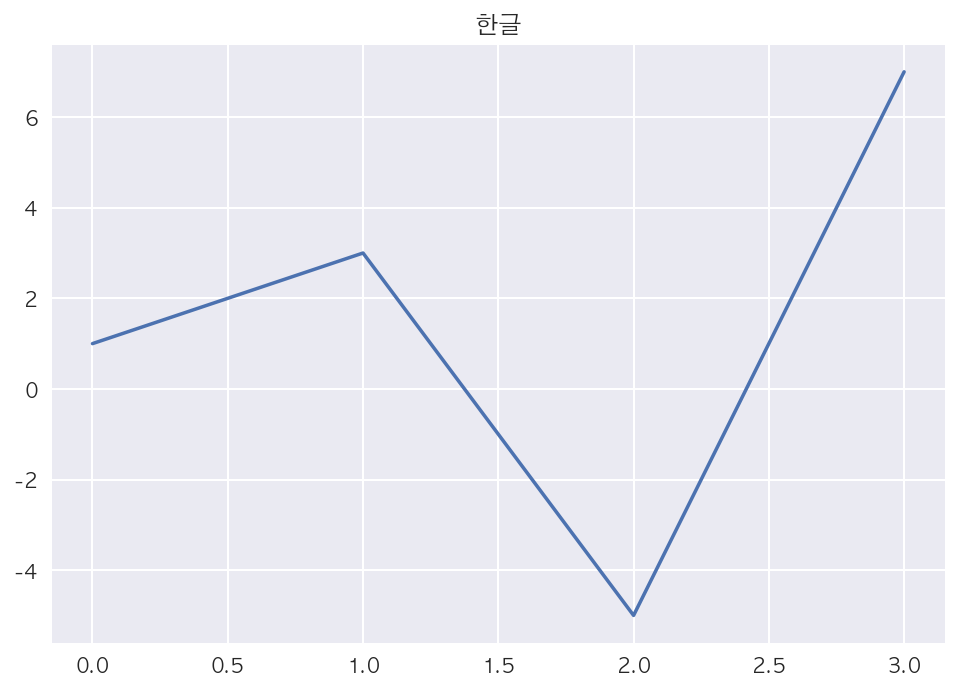

In [39]:
_ = pd.Series([1, 3, -5, 7]).plot(title='ÌïúÍ∏Ä')

----
#### ÌèêÍ∏∞Î¨º Î∞úÏÉù,Ï≤òÎ¶¨ÌòÑÌô© Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞

In [2]:
# ÌèêÍ∏∞Î¨º Î∞úÏÉùÌòÑÌô© Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
ocr_raw = pd.read_csv('output/waste_ocr_1920.csv')
ocr_raw.head()

ÏãúÎèÑÎ™Ö     2019     2020
0    Í∞ïÏõêÎèÑ   681199   667683
1    Í≤ΩÍ∏∞ÎèÑ  3483523  3901516
2   Í≤ΩÏÉÅÎÇ®ÎèÑ  1296772  1270196
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ   863991   903107
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú   423473   420659

In [3]:
ocr_raw.tail()

ÏãúÎèÑÎ™Ö    2019    2020
12     Ï†ÑÎùºÎÇ®ÎèÑ  627873  650020
13     Ï†ÑÎùºÎ∂ÅÎèÑ  576006  612062
14  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  350108  417739
15     Ï∂©Ï≤≠ÎÇ®ÎèÑ  835120  766650
16     Ï∂©Ï≤≠Î∂ÅÎèÑ  695726  659454

In [4]:
# ÌèêÍ∏∞Î¨º Ï≤òÎ¶¨ÌòÑÌô© Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
prs_raw = pd.read_csv('output/waste_prs_1920.csv')
prs_raw.head()

ÏãúÎèÑÎ™Ö  Ï≤òÎ¶¨ÏóÖÏ≤¥ Ï≤òÎ¶¨Î∞©Ïãù      2019      2020
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Í≥µÍ≥µÏ≤òÎ¶¨   Îß§Î¶Ω  303169.0  344031.3
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Í≥µÍ≥µÏ≤òÎ¶¨   ÏÜåÍ∞Å  690908.5  730391.5
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Í≥µÍ≥µÏ≤òÎ¶¨  Ïû¨ÌôúÏö©  383323.0  379742.3
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Í≥µÍ≥µÏ≤òÎ¶¨   Í∏∞ÌÉÄ       0.0       0.0
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  ÏúÑÌÉÅÏ≤òÎ¶¨   Îß§Î¶Ω   51027.0    1522.0

In [5]:
prs_raw.tail()

ÏãúÎèÑÎ™Ö  Ï≤òÎ¶¨ÏóÖÏ≤¥ Ï≤òÎ¶¨Î∞©Ïãù    2019    2020
199  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  ÏúÑÌÉÅÏ≤òÎ¶¨   Í∏∞ÌÉÄ     0.0     0.0
200  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  ÏûêÍ∞ÄÏ≤òÎ¶¨   Îß§Î¶Ω     0.0     0.0
201  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  ÏûêÍ∞ÄÏ≤òÎ¶¨   ÏÜåÍ∞Å     0.0     0.0
202  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  ÏûêÍ∞ÄÏ≤òÎ¶¨  Ïû¨ÌôúÏö©  1752.0  1960.2
203  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  ÏûêÍ∞ÄÏ≤òÎ¶¨   Í∏∞ÌÉÄ     0.0     0.0

In [6]:
# shape ÏÇ¥Ìé¥Î≥¥Í∏∞
ocr_raw.shape, prs_raw.shape

((17, 3), (204, 5))

In [7]:
# Í∞úÎûµÏ†Å Ï†ïÎ≥¥ ÏÇ¥Ìé¥Î≥¥Í∏∞
ocr_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ÏãúÎèÑÎ™Ö     17 non-null     object
 1   2019    17 non-null     int64 
 2   2020    17 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 536.0+ bytes


In [8]:
prs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ÏãúÎèÑÎ™Ö     204 non-null    object 
 1   Ï≤òÎ¶¨ÏóÖÏ≤¥    204 non-null    object 
 2   Ï≤òÎ¶¨Î∞©Ïãù    204 non-null    object 
 3   2019    204 non-null    float64
 4   2020    204 non-null    float64
dtypes: float64(2), object(3)
memory usage: 8.1+ KB


In [9]:
"""
Î∞úÏÉùÎüâ
1. 19 -> 20ÎÖÑ Í∞ÄÎ©¥ÏÑú ÌèâÍ∑† 2ÎßåÌÜ§ Ï†ïÎèÑ ÎäòÏñ¥ÎÇ®
2. max Í∞íÏùÄ 50Îßå ÌÜ§ Ï†ïÎèÑ ÎäòÏñ¥ÎÇ®
"""

# ÏàòÏπòÌòï Í∏∞Ïà†ÌÜµÍ≥Ñ
# ocr_raw['2020'].describe().apply("{0:.0f}".format)
pd.set_option('display.float_format', lambda x: '%.f' % x) # Î∂ÄÎèôÏÜåÏàòÏ†ê ÌëúÌòÑ ÏóÜÏï†Í∏∞
ocr_raw.describe()


2019    2020
count      17      17
mean   985760 1017846
std    924634  997739
min    118734  117891
25%    469645  498151
50%    695726  667683
75%    937283  938049
max   3483523 3901516

In [10]:
"""
Ï≤òÎ¶¨Îüâ
1. min Í∞íÏù¥ 0Ïù∏Í±¥
- ÎÖÑÏóê ÌïòÎÇòÎèÑ Ï≤òÎ¶¨ÌïòÏßÄ ÏïäÎäî ÏóÖÏ≤¥Í∞Ä ÏûàÎã§Îäî ÎúªÏù∏Í∞Ä?
- ÏïÑÎãàÎ©¥ Ìï¥Îãπ Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÏÜçÌïú ÏóÖÏ≤¥Í∞Ä ÏóÜÎã§Îäî ÎúªÏù∏Í∞Ä? ÏóÜÎã§Îäî ÎúªÏù¥Í≤†ÏßÄ?
"""

prs_raw.describe()


2019    2020
count     204     204
mean    82147   84821
std    191868  204561
min         0       0
25%         0       0
50%      1716     519
75%    106115  106222
max   1627280 1648634

In [11]:
# Î≤îÏ£ºÌòï Í∏∞Ïà†ÌÜµÍ≥Ñ
ocr_raw.describe(include='object')

ÏãúÎèÑÎ™Ö
count    17
unique   17
top     Í∞ïÏõêÎèÑ
freq      1

In [12]:
prs_raw.describe(include='object')

ÏãúÎèÑÎ™Ö  Ï≤òÎ¶¨ÏóÖÏ≤¥ Ï≤òÎ¶¨Î∞©Ïãù
count     204   204  204
unique     17     3    4
top     ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Í≥µÍ≥µÏ≤òÎ¶¨   Îß§Î¶Ω
freq       12    68   51

In [21]:
# Î∞úÏÉùÎüâÍ≥º Ï≤òÎ¶¨ÎüâÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏ÌïòÍ∏∞
ocr_raw


ÏãúÎèÑÎ™Ö     2019     2020
0       Í∞ïÏõêÎèÑ   681199   667683
1       Í≤ΩÍ∏∞ÎèÑ  3483523  3901516
2      Í≤ΩÏÉÅÎÇ®ÎèÑ  1296772  1270196
3      Í≤ΩÏÉÅÎ∂ÅÎèÑ   863991   903107
4     Í¥ëÏ£ºÍ¥ëÏó≠Ïãú   423473   420659
5     ÎåÄÍµ¨Í¥ëÏó≠Ïãú   937283   938049
6     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú   469645   498151
7     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  1077115  1148394
8     ÏÑúÏö∏ÌäπÎ≥ÑÏãú  3160170  3177620
9   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú   118734   117891
10    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú   462637   422336
11    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   698537   731850
12     Ï†ÑÎùºÎÇ®ÎèÑ   627873   650020
13     Ï†ÑÎùºÎ∂ÅÎèÑ   576006   612062
14  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ   350108   417739
15     Ï∂©Ï≤≠ÎÇ®ÎèÑ   835120   766650
16     Ï∂©Ï≤≠Î∂ÅÎèÑ   695726   659454

In [22]:
pd.set_option('display.float_format', None)
prs_raw.groupby(by=['ÏãúÎèÑÎ™Ö']).sum().astype('int')

2019     2020
ÏãúÎèÑÎ™Ö                      
Í∞ïÏõêÎèÑ       681199   667683
Í≤ΩÍ∏∞ÎèÑ      3483523  3901516
Í≤ΩÏÉÅÎÇ®ÎèÑ     1296772  1270196
Í≤ΩÏÉÅÎ∂ÅÎèÑ      863991   903107
Í¥ëÏ£ºÍ¥ëÏó≠Ïãú     423473   420659
ÎåÄÍµ¨Í¥ëÏó≠Ïãú     937283   938049
ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú     469645   498151
Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú    1077115  1148394
ÏÑúÏö∏ÌäπÎ≥ÑÏãú    3160170  3177620
ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú   118734   117891
Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú     462637   422336
Ïù∏Ï≤úÍ¥ëÏó≠Ïãú     698537   731850
Ï†ÑÎùºÎÇ®ÎèÑ      627873   650020
Ï†ÑÎùºÎ∂ÅÎèÑ      576006   612062
Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ   350108   417739
Ï∂©Ï≤≠ÎÇ®ÎèÑ      835120   766650
Ï∂©Ï≤≠Î∂ÅÎèÑ      695726   659454

In [25]:
# Í≤∞Ï∏°Ïπò ÏÇ¥Ìé¥Î≥¥Í∏∞
ocr_raw.isnull().sum().sum(), prs_raw.isnull().sum().sum()

(0, 0)

In [28]:
# Ï§ëÎ≥µÍ∞í ÏÇ¥Ìé¥Î≥¥Í∏∞
ocr_raw.duplicated().sum(), prs_raw.duplicated().sum()

(0, 0)

----
#### ÌèêÍ∏∞Î¨º Î∞úÏÉù,Ï≤òÎ¶¨ÌòÑÌô© Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

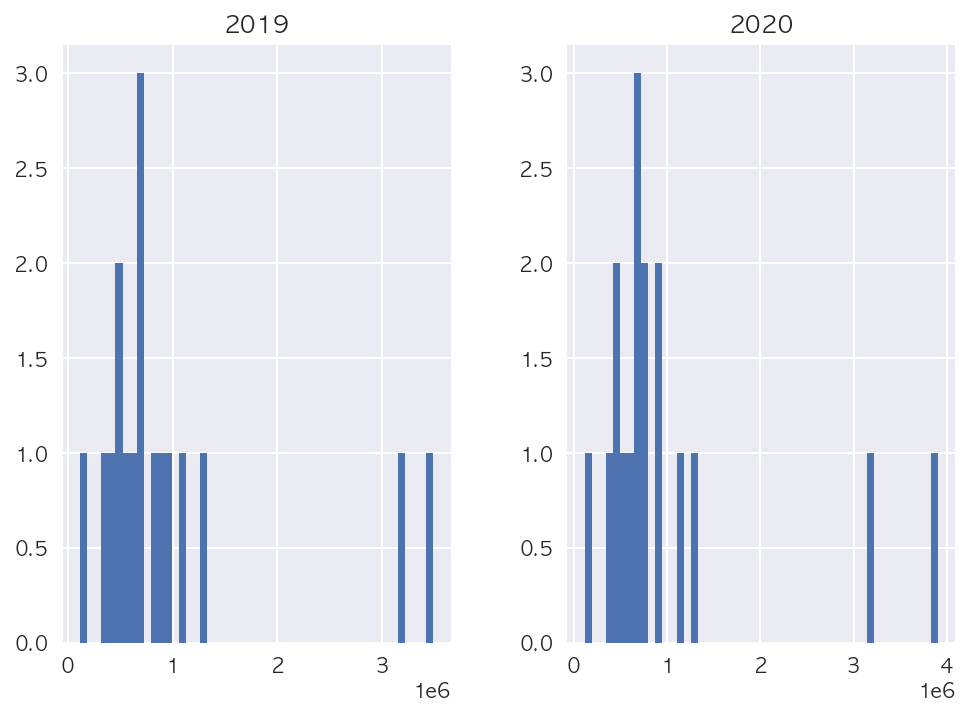

In [37]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î†§Î≥¥Í∏∞
_ = ocr_raw.hist(bins=50)

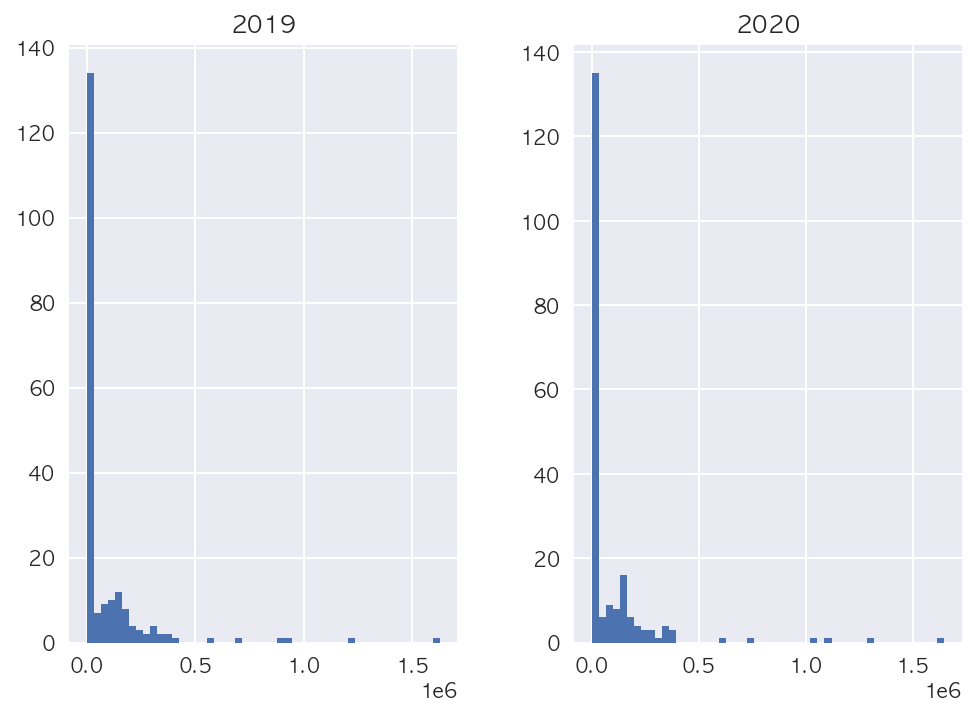

In [41]:
_ = prs_raw.hist(bins=50)

In [42]:
# ÏßÄÏó≠Ïóê Îî∞Î•∏ ÌèêÍ∏∞Î¨º Î∞úÏÉùÎüâ
ocr_raw

ÏãúÎèÑÎ™Ö     2019     2020
0       Í∞ïÏõêÎèÑ   681199   667683
1       Í≤ΩÍ∏∞ÎèÑ  3483523  3901516
2      Í≤ΩÏÉÅÎÇ®ÎèÑ  1296772  1270196
3      Í≤ΩÏÉÅÎ∂ÅÎèÑ   863991   903107
4     Í¥ëÏ£ºÍ¥ëÏó≠Ïãú   423473   420659
5     ÎåÄÍµ¨Í¥ëÏó≠Ïãú   937283   938049
6     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú   469645   498151
7     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  1077115  1148394
8     ÏÑúÏö∏ÌäπÎ≥ÑÏãú  3160170  3177620
9   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú   118734   117891
10    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú   462637   422336
11    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   698537   731850
12     Ï†ÑÎùºÎÇ®ÎèÑ   627873   650020
13     Ï†ÑÎùºÎ∂ÅÎèÑ   576006   612062
14  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ   350108   417739
15     Ï∂©Ï≤≠ÎÇ®ÎèÑ   835120   766650
16     Ï∂©Ï≤≠Î∂ÅÎèÑ   695726   659454

In [390]:
fig = px.histogram(ocr_raw, x='ÏãúÎèÑÎ™Ö', y=['2019', '2020'],
                histfunc='sum', title='Ïó∞ÎèÑÎ≥Ñ ÌèêÍ∏∞Î¨º Î∞úÏÉùÎüâ Ïàò',
                barmode='group', text_auto=True,
                width=1000, height=500,
    )
fig.update_traces(
    texttemplate='%{y:,d} ÌÜ§',
)
# Ï¶ùÍ∞Ä/ÌïòÎùΩ ÎÇòÌÉÄÎÇ¥Í∏∞
fig.add_annotation(x=0, y=1, text='<b style="color:blue">ÌïòÎùΩ</b>', showarrow=False, yshift=65)
fig.add_annotation(x=2, y=1, text='<b style="color:blue">ÌïòÎùΩ</b>', showarrow=False, yshift=110)
fig.add_annotation(x=4, y=1, text='<b style="color:blue">ÌïòÎùΩ</b>', showarrow=False, yshift=45)
fig.add_annotation(x=9, y=1, text='<b style="color:blue">ÌïòÎùΩ</b>', showarrow=False, yshift=25)
fig.add_annotation(x=10, y=1, text='<b style="color:blue">ÌïòÎùΩ</b>', showarrow=False, yshift=45)
fig.add_annotation(x=15, y=1, text='<b style="color:blue">ÌïòÎùΩ</b>', showarrow=False, yshift=75)
fig.add_annotation(x=16, y=1, text='<b style="color:blue">ÌïòÎùΩ</b>', showarrow=False, yshift=65)
# fig.add_annotation(
#     x=1, y=1, text='<b style="color:white">Ï¶ùÍ∞Ä!</b>', showarrow=False, yshift=310,
#     bordercolor='black', bgcolor='black', borderpad=2)
fig.add_annotation(
    x=1, y=1, text='<b style="color:red">Ï¶ùÍ∞Ä!</b>', showarrow=False, yshift=310,)
fig.add_annotation(
    x=3, y=1, text='<b style="color:red">Ï¶ùÍ∞Ä!</b>', showarrow=False, yshift=80)
fig.add_annotation(
    x=5, y=1, text='<b style="color:red">Ï¶ùÍ∞Ä!</b>', showarrow=False, yshift=85)
fig.add_annotation(
    x=6, y=1, text='<b style="color:red">Ï¶ùÍ∞Ä!</b>', showarrow=False, yshift=50)
fig.add_annotation(
    x=7, y=1, text='<b style="color:red">Ï¶ùÍ∞Ä!</b>', showarrow=False, yshift=100)
fig.add_annotation(
    x=8, y=1, text='<b style="color:red">Ï¶ùÍ∞Ä!</b>', showarrow=False, yshift=255)
fig.add_annotation(
    x=11, y=1, text='<b style="color:red">Ï¶ùÍ∞Ä!</b>', showarrow=False, yshift=70)
fig.add_annotation(
    x=12, y=1, text='<b style="color:red">Ï¶ùÍ∞Ä!</b>', showarrow=False, yshift=65)
fig.add_annotation(
    x=13, y=1, text='<b style="color:red">Ï¶ùÍ∞Ä!</b>', showarrow=False, yshift=60)
fig.add_annotation(
    x=14, y=1, text='<b style="color:red">Ï¶ùÍ∞Ä!</b>', showarrow=False, yshift=45)
fig.add_annotation(
    x=1, y=1, showarrow=False, xshift=120, yshift=200,
    text='<b style="color:white">Í≤ΩÍ∏∞ÎèÑÎäî Ïã¨ÏßÄÏñ¥ ÎåÄÎûµ 42ÎßåÌÜ§ Ï¶ùÍ∞Ä üìà</b>', bordercolor='black',
    bgcolor='black', borderpad=5
)

fig.update_layout(
    xaxis_title = 'ÏãúÎèÑÎ™Ö',
    yaxis_title = 'Î∞úÏÉùÏ¥ùÌï©'
)
fig.show()

In [94]:
# ÏßÄÏó≠Ïóê Îî∞Î•∏ ÌèêÍ∏∞Î¨º Ï≤òÎ¶¨Îüâ
prs_raw.groupby(by=['ÏãúÎèÑÎ™Ö', 'Ï≤òÎ¶¨ÏóÖÏ≤¥', 'Ï≤òÎ¶¨Î∞©Ïãù']).sum().head(20)

2019       2020
ÏãúÎèÑÎ™Ö Ï≤òÎ¶¨ÏóÖÏ≤¥ Ï≤òÎ¶¨Î∞©Ïãù                      
Í∞ïÏõêÎèÑ Í≥µÍ≥µÏ≤òÎ¶¨ Í∏∞ÌÉÄ       2299.5     2580.7
         Îß§Î¶Ω     205750.5   184571.6
         ÏÜåÍ∞Å     151000.5   161357.0
         Ïû¨ÌôúÏö©    148007.5   184168.7
    ÏúÑÌÉÅÏ≤òÎ¶¨ Í∏∞ÌÉÄ        693.5      712.5
         Îß§Î¶Ω         36.5       50.7
         ÏÜåÍ∞Å       1569.5        0.0
         Ïû¨ÌôúÏö©    163921.5   133434.5
    ÏûêÍ∞ÄÏ≤òÎ¶¨ Í∏∞ÌÉÄ          0.0        0.0
         Îß§Î¶Ω          0.0        0.0
         ÏÜåÍ∞Å          0.0        0.0
         Ïû¨ÌôúÏö©      7920.5      807.8
Í≤ΩÍ∏∞ÎèÑ Í≥µÍ≥µÏ≤òÎ¶¨ Í∏∞ÌÉÄ       5621.0        0.0
         Îß§Î¶Ω     264625.0   338026.6
         ÏÜåÍ∞Å    1222129.5  1312805.1
         Ïû¨ÌôúÏö©    914142.5  1096148.5
    ÏúÑÌÉÅÏ≤òÎ¶¨ Í∏∞ÌÉÄ       7665.0    13533.3
         Îß§Î¶Ω      76358.0     2147.3
         ÏÜåÍ∞Å     101141.5    93141.3
         Ïû¨ÌôúÏö©    883957.0  1039095.3

In [271]:
# Ï≤òÎ¶¨ÏóÖÏ≤¥Î≥Ñ Ï≤òÎ¶¨Î∞©Ïãù ÎπÑÏú®
prs_com_g = prs_raw.groupby(by=['Ï≤òÎ¶¨ÏóÖÏ≤¥', 'Ï≤òÎ¶¨Î∞©Ïãù'], as_index=False).sum()
prs_com_g

Ï≤òÎ¶¨ÏóÖÏ≤¥ Ï≤òÎ¶¨Î∞©Ïãù       2019       2020
0   Í≥µÍ≥µÏ≤òÎ¶¨   Í∏∞ÌÉÄ    23141.0    42231.1
1   Í≥µÍ≥µÏ≤òÎ¶¨   Îß§Î¶Ω  2328955.5  2405918.7
2   Í≥µÍ≥µÏ≤òÎ¶¨   ÏÜåÍ∞Å  4266302.5  4560506.4
3   Í≥µÍ≥µÏ≤òÎ¶¨  Ïû¨ÌôúÏö©  3868306.5  4155660.3
4   ÏúÑÌÉÅÏ≤òÎ¶¨   Í∏∞ÌÉÄ    38507.5    14585.8
5   ÏúÑÌÉÅÏ≤òÎ¶¨   Îß§Î¶Ω   135086.5    18449.1
6   ÏúÑÌÉÅÏ≤òÎ¶¨   ÏÜåÍ∞Å   515234.0   498188.3
7   ÏúÑÌÉÅÏ≤òÎ¶¨  Ïû¨ÌôúÏö©  5547708.0  5583715.3
8   ÏûêÍ∞ÄÏ≤òÎ¶¨   Í∏∞ÌÉÄ      401.5      880.1
9   ÏûêÍ∞ÄÏ≤òÎ¶¨   Îß§Î¶Ω      985.5        0.0
10  ÏûêÍ∞ÄÏ≤òÎ¶¨   ÏÜåÍ∞Å      474.5      124.0
11  ÏûêÍ∞ÄÏ≤òÎ¶¨  Ïû¨ÌôúÏö©    32813.5    23127.3

In [304]:
fig = px.sunburst(prs_com_g, path=['Ï≤òÎ¶¨ÏóÖÏ≤¥', 'Ï≤òÎ¶¨Î∞©Ïãù'],
                  values='2019', title='2019ÎÖÑ Ï†ÑÍµ≠ ÌèêÍ∏∞Î¨º Ï≤òÎ¶¨ÏóÖÏ≤¥Î≥Ñ Ï≤òÎ¶¨Î∞©Ïãù ÎπÑÏú®')
fig.update_traces(
    textinfo='value+label', textfont={'size': 15},
    texttemplate='<b>%{label}</b><br>%{percentRoot}<br>%{value}', insidetextorientation='horizontal'
)
fig.show()


In [292]:
px.histogram(prs_raw, y='ÏãúÎèÑÎ™Ö', x='2019', color='Ï≤òÎ¶¨ÏóÖÏ≤¥', barmode='group',
            title='2019ÎÖÑ ÏãúÎèÑÎ≥Ñ ÌèêÍ∏∞Î¨º Ï≤òÎ¶¨ÏóÖÏ≤¥',
            histfunc='sum',
)


In [278]:
fig = px.sunburst(prs_com_g, path=['Ï≤òÎ¶¨ÏóÖÏ≤¥', 'Ï≤òÎ¶¨Î∞©Ïãù'],
                  values='2020', title='2020ÎÖÑ Ï†ÑÍµ≠ ÌèêÍ∏∞Î¨º Ï≤òÎ¶¨ÏóÖÏ≤¥Î≥Ñ Ï≤òÎ¶¨Î∞©Ïãù ÎπÑÏú®')
fig.update_traces(
    textinfo='value+label', textfont={'size': 15},
    texttemplate='<b>%{label}</b><br>%{percentRoot}<br>%{value}', insidetextorientation='horizontal'
)
fig.show()


In [287]:
px.histogram(prs_raw, y='ÏãúÎèÑÎ™Ö', x='2020', color='Ï≤òÎ¶¨ÏóÖÏ≤¥', barmode='group',
            histfunc='sum',
            title='2020ÎÖÑ ÏãúÎèÑÎ≥Ñ ÌèêÍ∏∞Î¨º Ï≤òÎ¶¨ÏóÖÏ≤¥')


In [301]:
fig = px.histogram(prs_raw, x='ÏãúÎèÑÎ™Ö', y='2019', color='Ï≤òÎ¶¨Î∞©Ïãù',
                title='2019ÎÖÑ ÏãúÎèÑÎ≥Ñ ÌèêÍ∏∞Î¨º Ï≤òÎ¶¨Î∞©Ïãù')
fig.update_traces(
    texttemplate='%{y:,d} ÌÜ§',
)
fig.update_layout(
    xaxis_title = 'ÏãúÎèÑÎ™Ö',
    yaxis_title = 'ÌèêÍ∏∞Î¨º Î∞úÏÉùÎüâ'
)

In [302]:
fig = px.histogram(prs_raw, x='ÏãúÎèÑÎ™Ö', y='2020', color='Ï≤òÎ¶¨Î∞©Ïãù',
                title='2020ÎÖÑ ÏãúÎèÑÎ≥Ñ ÌèêÍ∏∞Î¨º Ï≤òÎ¶¨Î∞©Ïãù')
fig.update_traces(
    texttemplate='%{y:,d} ÌÜ§',
)
fig.update_layout(
    xaxis_title = 'ÏãúÎèÑÎ™Ö',
    yaxis_title = 'ÌèêÍ∏∞Î¨º Î∞úÏÉùÎüâ'
)

In [394]:
# ÏÜåÍ∞Å Ï≤òÎ¶¨Îüâ ÏãúÍ∞ÅÌôî
prs_fire = prs_raw[prs_raw['Ï≤òÎ¶¨Î∞©Ïãù'] == 'ÏÜåÍ∞Å'].groupby('ÏãúÎèÑÎ™Ö', as_index=False).sum()
prs_fire

ÏãúÎèÑÎ™Ö       2019       2020
0       Í∞ïÏõêÎèÑ   152570.0   161357.0
1       Í≤ΩÍ∏∞ÎèÑ  1323709.0  1405946.4
2      Í≤ΩÏÉÅÎÇ®ÎèÑ   409676.0   393281.7
3      Í≤ΩÏÉÅÎ∂ÅÎèÑ   391170.5   456366.9
4     Í¥ëÏ£ºÍ¥ëÏó≠Ïãú     4964.0    13906.1
5     ÎåÄÍµ¨Í¥ëÏó≠Ïãú    95630.0    90841.7
6     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú    67926.5    49455.7
7     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú   153738.0   162047.7
8     ÏÑúÏö∏ÌäπÎ≥ÑÏãú   790225.0   797766.1
9   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú    31025.0    29390.1
10    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú   175382.5   170716.7
11    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   188559.0   219634.7
12     Ï†ÑÎùºÎÇ®ÎèÑ   122384.5   137129.0
13     Ï†ÑÎùºÎ∂ÅÎèÑ   164615.0   180143.7
14  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ    95119.0   136694.6
15     Ï∂©Ï≤≠ÎÇ®ÎèÑ   366241.0   380293.1
16     Ï∂©Ï≤≠Î∂ÅÎèÑ   249076.0   273847.5

In [398]:
prs_fire_m = prs_fire.melt(id_vars=['ÏãúÎèÑÎ™Ö'], value_name='ÏÜåÍ∞ÅÎüâ', var_name='ÏãúÏ†ê')
prs_fire_m.head()

ÏãúÎèÑÎ™Ö    ÏãúÏ†ê        ÏÜåÍ∞ÅÎüâ
0    Í∞ïÏõêÎèÑ  2019   152570.0
1    Í≤ΩÍ∏∞ÎèÑ  2019  1323709.0
2   Í≤ΩÏÉÅÎÇ®ÎèÑ  2019   409676.0
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ  2019   391170.5
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  2019     4964.0

In [446]:
fig = px.histogram(prs_fire_m, x='ÏãúÎèÑÎ™Ö', y='ÏÜåÍ∞ÅÎüâ', color='ÏãúÏ†ê'
            ,barmode='group', title='Ïó∞ÎèÑÎ≥Ñ ÏÉùÌôúÌèêÍ∏∞Î¨º ÏÜåÍ∞ÅÎüâ'
            ,width=1000)
fig.update_traces(
    texttemplate='%{y:,d} ÌÜ§',
)
fig.add_annotation(
    x=3, y=1, xshift=150, yshift=200,
    text='<span style="color:white"><b>Ï¶ùÍ∞ÄÌïú ÎèÑÏãú:</b> Í∞ïÏõê, Í≤ΩÍ∏∞, Í≤ΩÎ∂Å, Í¥ëÏ£º, Î∂ÄÏÇ∞, ÏÑúÏö∏, Ïù∏Ï≤ú, Ï†ÑÎÇ®, Ï†ÑÎ∂Å, Ï†úÏ£º, Ï∂©ÎÇ®, Ï∂©Î∂Å<span>',
    showarrow=False,
    bgcolor='black', bordercolor='black', borderwidth=3
)
fig.add_annotation(
    x=3, y=1, xshift=47, yshift=170,
    text='<span style="color:white"><b>Í∞êÏÜåÌïú ÎèÑÏãú:</b> Í≤ΩÎÇ®, ÎåÄÍµ¨, ÎåÄÏ†Ñ, ÏÑ∏Ï¢Ö, Ïö∏ÏÇ∞<span>',
    showarrow=False,
    bgcolor='black', bordercolor='black', borderwidth=3
)
fig.show()

In [447]:
# Îß§Î¶Ω Ï≤òÎ¶¨Îüâ ÏãúÍ∞ÅÌôî
prs_land = prs_raw[prs_raw['Ï≤òÎ¶¨Î∞©Ïãù'] == 'Îß§Î¶Ω'].groupby('ÏãúÎèÑÎ™Ö', as_index=False).sum()
prs_land

ÏãúÎèÑÎ™Ö      2019      2020
0       Í∞ïÏõêÎèÑ  205787.0  184622.3
1       Í≤ΩÍ∏∞ÎèÑ  340983.0  340173.9
2      Í≤ΩÏÉÅÎÇ®ÎèÑ  205531.5  220772.3
3      Í≤ΩÏÉÅÎ∂ÅÎèÑ  138262.0  107134.9
4     Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  189435.0  170417.3
5     ÎåÄÍµ¨Í¥ëÏó≠Ïãú  178047.0  226671.0
6     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú   76431.0   83539.6
7     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú   36135.0   38610.9
8     ÏÑúÏö∏ÌäπÎ≥ÑÏãú  354196.0  345553.3
9   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú    2847.0       0.0
10    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú   56392.5   41310.7
11    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  123406.5  112865.6
12     Ï†ÑÎùºÎÇ®ÎèÑ  254295.5  236183.2
13     Ï†ÑÎùºÎ∂ÅÎèÑ  114537.0  119065.2
14  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ   21608.0   19147.0
15     Ï∂©Ï≤≠ÎÇ®ÎèÑ   47048.5   67713.5
16     Ï∂©Ï≤≠Î∂ÅÎèÑ  120085.0  110587.1

In [450]:
prs_land_m = prs_land.melt(id_vars=['ÏãúÎèÑÎ™Ö'], value_name='Îß§Î¶ΩÎüâ', var_name='ÏãúÏ†ê')
prs_land_m.head()

ÏãúÎèÑÎ™Ö    ÏãúÏ†ê       Îß§Î¶ΩÎüâ
0    Í∞ïÏõêÎèÑ  2019  205787.0
1    Í≤ΩÍ∏∞ÎèÑ  2019  340983.0
2   Í≤ΩÏÉÅÎÇ®ÎèÑ  2019  205531.5
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ  2019  138262.0
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  2019  189435.0

In [457]:
fig = px.histogram(prs_land_m, x='ÏãúÎèÑÎ™Ö', y='Îß§Î¶ΩÎüâ', color='ÏãúÏ†ê',
                   barmode='group', title='Ïó∞ÎèÑÎ≥Ñ ÏÉùÌôúÌèêÍ∏∞Î¨º Îß§Î¶ΩÎüâ', width=1000)
fig.update_traces(
    texttemplate='%{y:,d} ÌÜ§',
)
fig.add_annotation(
    x=3, y=1, xshift=70, yshift=200,
    text='<span style="color:white"><b>Ï¶ùÍ∞ÄÌïú ÎèÑÏãú:</b> Í≤ΩÎÇ®, ÎåÄÍµ¨, ÎåÄÏ†Ñ, Î∂ÄÏÇ∞, Ï†ÑÎ∂Å, Ï∂©ÎÇ®<span>',
    showarrow=False,
    bgcolor='black', bordercolor='black', borderwidth=3
)
fig.show()


----
#### Í¥ÄÎ¶¨ÎπÑÏö© ÏãúÍ∞ÅÌôî

In [458]:
# Í¥ÄÎ¶¨ÎπÑÏö© Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
budget_raw = pd.read_csv('output/budget_1920.csv')
budget_raw.head()

ÏãúÎèÑÎ™Ö     Î∂ÑÎ•ò       2019       2020
0  Í∞ïÏõêÎèÑ     Íµ≠ÎπÑ   12122744   23911725
1  Í∞ïÏõêÎèÑ  ÏÑ∏ÏûÖÏàòÏàòÎ£å   46171000   47846000
2  Í∞ïÏõêÎèÑ    ÏßÄÎ∞©ÎπÑ  517782926  582499714
3  Í≤ΩÍ∏∞ÎèÑ     Íµ≠ÎπÑ    3537843    3101540
4  Í≤ΩÍ∏∞ÎèÑ  ÏÑ∏ÏûÖÏàòÏàòÎ£å  308633000  366070000

In [460]:
# Í¥ÄÎ¶¨ÎπÑÏö© ÏãúÏ†ê tidy data ÎßåÎì§Í∏∞
budget_m = budget_raw.melt(id_vars=['ÏãúÎèÑÎ™Ö', 'Î∂ÑÎ•ò'], value_name='Í¥ÄÎ¶¨ÎπÑ', var_name='ÏãúÏ†ê')
budget_m.head()

ÏãúÎèÑÎ™Ö     Î∂ÑÎ•ò    ÏãúÏ†ê        Í¥ÄÎ¶¨ÎπÑ
0  Í∞ïÏõêÎèÑ     Íµ≠ÎπÑ  2019   12122744
1  Í∞ïÏõêÎèÑ  ÏÑ∏ÏûÖÏàòÏàòÎ£å  2019   46171000
2  Í∞ïÏõêÎèÑ    ÏßÄÎ∞©ÎπÑ  2019  517782926
3  Í≤ΩÍ∏∞ÎèÑ     Íµ≠ÎπÑ  2019    3537843
4  Í≤ΩÍ∏∞ÎèÑ  ÏÑ∏ÏûÖÏàòÏàòÎ£å  2019  308633000

In [472]:
# Ï†ÑÏ≤¥ Î∂ÑÎ•ò Ï∞®Ìä∏
px.histogram(budget_raw, x='ÏãúÎèÑÎ™Ö', y='2019', color='Î∂ÑÎ•ò',
                title='2019ÎÖÑ ÏãúÎèÑÎ≥Ñ ÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨ÏòàÏÇ∞')

In [ ]:
# Í¥ÄÎ¶¨ÏòàÏÇ∞ Íµ≠ÎπÑ
# budget_na = budget_raw[budget_raw['Î∂ÑÎ•ò'] == 'Íµ≠ÎπÑ'].groupby('ÏãúÎèÑÎ™Ö', as_index=False).sum()
# budget_na = budget_na.melt(id_vars=['ÏãúÎèÑÎ™Ö'], value_name='Íµ≠ÎπÑ', var_name='ÏãúÏ†ê')
# budget_na.head()

In [593]:
# px.histogram(budget_na, x='ÏãúÎèÑÎ™Ö', y='Íµ≠ÎπÑ',color='ÏãúÏ†ê', barmode='group' )


In [511]:
# Í¥ÄÎ¶¨ÎπÑÏö© & Î∞úÏÉùÎüâ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÌïòÍ∏∞
# ocr_m = ocr_raw.melt(id_vars=['ÏãúÎèÑÎ™Ö'], value_name='Î∞úÏÉùÎüâ', var_name='ÏãúÏ†ê')
# ocr_m.head()
ocr_19 = ocr_raw[['ÏãúÎèÑÎ™Ö', '2019']]
ocr_20 = ocr_raw[['ÏãúÎèÑÎ™Ö', '2020']]
ocr_20.head()

ÏãúÎèÑÎ™Ö     2020
0    Í∞ïÏõêÎèÑ   667683
1    Í≤ΩÍ∏∞ÎèÑ  3901516
2   Í≤ΩÏÉÅÎÇ®ÎèÑ  1270196
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ   903107
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú   420659

In [505]:
# budget_g_m =  budget_m.groupby(['ÏãúÎèÑÎ™Ö', 'ÏãúÏ†ê'], as_index=False).sum()
# budget_g_m.head()
budget_g = budget_raw.groupby('ÏãúÎèÑÎ™Ö', as_index=False).sum()
budget_g.head()

ÏãúÎèÑÎ™Ö        2019        2020
0    Í∞ïÏõêÎèÑ   576076670   654257439
1    Í≤ΩÍ∏∞ÎèÑ  3070568237  3264299736
2   Í≤ΩÏÉÅÎÇ®ÎèÑ   762637765   741598261
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ   705973507   826483954
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú   274282001   271466720

In [513]:
budget_g_19 = budget_g[['ÏãúÎèÑÎ™Ö', '2019']]
budget_g_20 = budget_g[['ÏãúÎèÑÎ™Ö', '2020']]
budget_g_20.head()

ÏãúÎèÑÎ™Ö        2020
0    Í∞ïÏõêÎèÑ   654257439
1    Í≤ΩÍ∏∞ÎèÑ  3264299736
2   Í≤ΩÏÉÅÎÇ®ÎèÑ   741598261
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ   826483954
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú   271466720

In [517]:
ocr_bg_19 = pd.merge(ocr_19, budget_g_19, on='ÏãúÎèÑÎ™Ö')
ocr_bg_19 = ocr_bg_19.rename(columns={'2019_x': 'Î∞úÏÉùÎüâ', '2019_y': 'Í¥ÄÎ¶¨ÏòàÏÇ∞'})
ocr_bg_19.head()

ÏãúÎèÑÎ™Ö      Î∞úÏÉùÎüâ        Í¥ÄÎ¶¨ÏòàÏÇ∞
0    Í∞ïÏõêÎèÑ   681199   576076670
1    Í≤ΩÍ∏∞ÎèÑ  3483523  3070568237
2   Í≤ΩÏÉÅÎÇ®ÎèÑ  1296772   762637765
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ   863991   705973507
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú   423473   274282001

In [518]:
ocr_bg_20 = pd.merge(ocr_20, budget_g_20, on='ÏãúÎèÑÎ™Ö')
ocr_bg_20 = ocr_bg_20.rename(columns={'2020_x': 'Î∞úÏÉùÎüâ', '2020_y': 'Í¥ÄÎ¶¨ÏòàÏÇ∞'})
ocr_bg_20.head()

ÏãúÎèÑÎ™Ö      Î∞úÏÉùÎüâ        Í¥ÄÎ¶¨ÏòàÏÇ∞
0    Í∞ïÏõêÎèÑ   667683   654257439
1    Í≤ΩÍ∏∞ÎèÑ  3901516  3264299736
2   Í≤ΩÏÉÅÎÇ®ÎèÑ  1270196   741598261
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ   903107   826483954
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú   420659   271466720

In [ ]:
# ocr_bg = pd.merge(ocr_raw, budget_g, on='ÏãúÎèÑÎ™Ö', suffixes=['_Î∞úÏÉùÎüâ', '_Í¥ÄÎ¶¨ÎπÑ'])
# ocr_bg.head()

In [521]:
ocr_bg_19_m = ocr_bg_19.melt(id_vars=['ÏãúÎèÑÎ™Ö'], var_name='Î∞úÏÉùÎüâ/Í¥ÄÎ¶¨ÏòàÏÇ∞', value_name='2019')
ocr_bg_19_m.head()

ÏãúÎèÑÎ™Ö Î∞úÏÉùÎüâ/Í¥ÄÎ¶¨ÏòàÏÇ∞     2019
0    Í∞ïÏõêÎèÑ      Î∞úÏÉùÎüâ   681199
1    Í≤ΩÍ∏∞ÎèÑ      Î∞úÏÉùÎüâ  3483523
2   Í≤ΩÏÉÅÎÇ®ÎèÑ      Î∞úÏÉùÎüâ  1296772
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ      Î∞úÏÉùÎüâ   863991
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú      Î∞úÏÉùÎüâ   423473

In [581]:
ocr_bg_20_m = ocr_bg_20.melt(id_vars=['ÏãúÎèÑÎ™Ö'], var_name='Î∞úÏÉùÎüâ/Í¥ÄÎ¶¨ÏòàÏÇ∞', value_name='2020')
ocr_bg_20_m.head()

ÏãúÎèÑÎ™Ö Î∞úÏÉùÎüâ/Í¥ÄÎ¶¨ÏòàÏÇ∞     2020
0    Í∞ïÏõêÎèÑ      Î∞úÏÉùÎüâ   667683
1    Í≤ΩÍ∏∞ÎèÑ      Î∞úÏÉùÎüâ  3901516
2   Í≤ΩÏÉÅÎÇ®ÎèÑ      Î∞úÏÉùÎüâ  1270196
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ      Î∞úÏÉùÎüâ   903107
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú      Î∞úÏÉùÎüâ   420659

In [591]:
ocr_colors = ['#636efa'] * len(ocr_raw['ÏãúÎèÑÎ™Ö'])
bg_colors = ['#ef553b'] * len(ocr_raw['ÏãúÎèÑÎ™Ö'])
bg_colors[11] = '#00cc96'
bg_colors[14] = '#00cc96'

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=ocr_bg_19_m['ÏãúÎèÑÎ™Ö'],
        y=(ocr_bg_19_m.loc[ocr_bg_19_m['Î∞úÏÉùÎüâ/Í¥ÄÎ¶¨ÏòàÏÇ∞'] == 'Î∞úÏÉùÎüâ', '2019']),
        name="Î∞úÏÉùÎüâ",
        offsetgroup=1,
    ),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=ocr_bg_19_m['ÏãúÎèÑÎ™Ö'],
        y=(ocr_bg_19_m.loc[ocr_bg_19_m['Î∞úÏÉùÎüâ/Í¥ÄÎ¶¨ÏòàÏÇ∞'] == 'Í¥ÄÎ¶¨ÏòàÏÇ∞', '2019']),
        name="Í¥ÄÎ¶¨ÏòàÏÇ∞",
        offsetgroup=2,
        marker_color=bg_colors
    ),
    secondary_y=True,
)

fig.update_layout(
    title_text="2019ÎÖÑ ÌèêÍ∏∞Î¨º Î∞úÏÉùÎüâ Î∞è Í¥ÄÎ¶¨ÏòàÏÇ∞ Ï∂îÏù¥",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="xaxis title")

fig.update_yaxes(title_text="<b>Î∞úÏÉùÎüâ</b>(ÌÜ§)", secondary_y=False)
fig.update_yaxes(title_text="<b>Í¥ÄÎ¶¨ÏòàÏÇ∞</b>(Ï≤úÏõê)", secondary_y=True)

fig.add_annotation(x=1, y=1, yshift=250,
                   text='<b>Max !</b>',
                   showarrow=False)
fig.add_annotation(x=11, y=1, xshift=25, yshift=70,
                   text='<b style="color:white"> Í¥ÄÎ¶¨ÏòàÏÇ∞Ïù¥ Îçî ÎÜíÏùÄ Í≥≥ üí∞</b>',
                   showarrow=False, bordercolor='black', borderpad=2, bgcolor='black')
fig.show()


In [587]:
ocr_colors = ['#636efa'] * len(ocr_raw['ÏãúÎèÑÎ™Ö'])
bg_colors = ['#ef553b'] * len(ocr_raw['ÏãúÎèÑÎ™Ö'])
bg_colors[0] = '#00cc96'
bg_colors[3] = '#00cc96'
bg_colors[11] = '#00cc96'
bg_colors[14] = '#00cc96'

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=ocr_bg_20_m['ÏãúÎèÑÎ™Ö'], y=(ocr_bg_20_m.loc[ocr_bg_20_m['Î∞úÏÉùÎüâ/Í¥ÄÎ¶¨ÏòàÏÇ∞'] == 'Î∞úÏÉùÎüâ', '2020']),
    name="Î∞úÏÉùÎüâ", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=ocr_bg_20_m['ÏãúÎèÑÎ™Ö'], y=(ocr_bg_20_m.loc[ocr_bg_20_m['Î∞úÏÉùÎüâ/Í¥ÄÎ¶¨ÏòàÏÇ∞'] == 'Í¥ÄÎ¶¨ÏòàÏÇ∞', '2020']),
           name="Í¥ÄÎ¶¨ÏòàÏÇ∞", offsetgroup=2, marker_color=bg_colors),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020ÎÖÑ ÌèêÍ∏∞Î¨º Î∞úÏÉùÎüâ Î∞è Í¥ÄÎ¶¨ÏòàÏÇ∞ Ï∂îÏù¥",
    xaxis_tickangle=-45,
    # width=1600,
    barmode='group'
)

fig.update_xaxes(title_text="xaxis title")

fig.update_yaxes(title_text="<b>Î∞úÏÉùÎüâ</b>(ÌÜ§)", secondary_y=False)
fig.update_yaxes(title_text="<b>Í¥ÄÎ¶¨ÏòàÏÇ∞</b>(Ï≤úÏõê)", secondary_y=True)

fig.add_annotation(x=1, y=1, yshift=250,
                    text='<b>Max !</b>',
                    showarrow=False)
fig.add_annotation(x=11, y=1, xshift=30, yshift=90,
                    text='<b style="color:white"> Í¥ÄÎ¶¨ÏòàÏÇ∞Ïù¥ Îçî ÎÜíÏùÄ Í≥≥ üí∞</b>',
                    showarrow=False, bordercolor='black', borderpad=2, bgcolor='black')
fig.show()


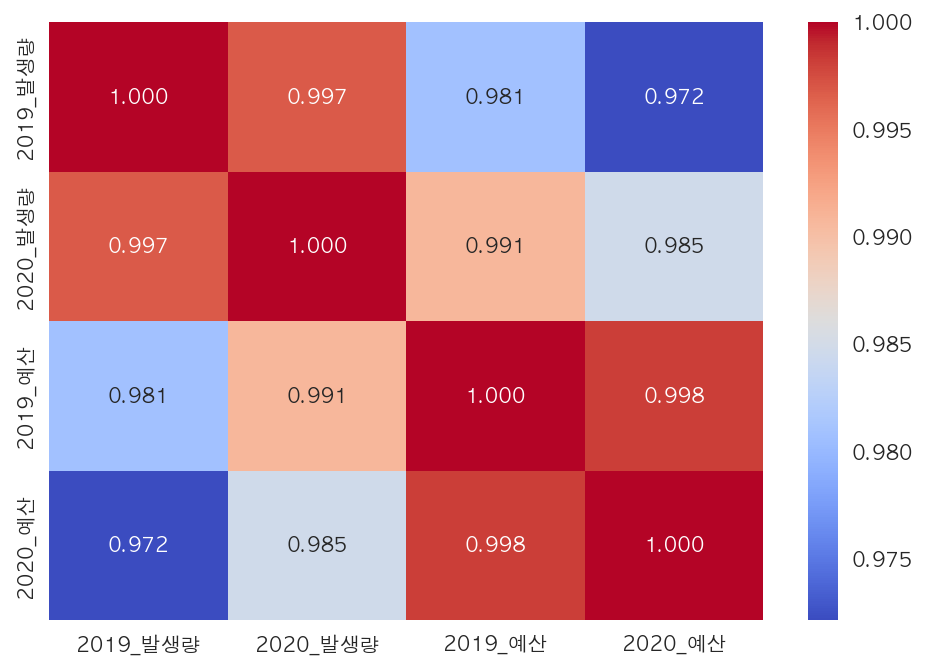

In [491]:
# Í¥ÄÎ¶¨ÏòàÏÇ∞Í≥º Î∞úÏÉùÎüâ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
_ = sns.heatmap(ocr_bg.corr(), cmap='coolwarm', annot=True, fmt='.3f')

----
#### Í¥ÄÎ¶¨Íµ¨Ïó≠ Ï†ïÎ≥¥ ÏãúÍ∞ÅÌôî

In [594]:
info_raw = pd.read_csv('output/info_1920.csv')
info_raw.head()

ÏãúÎèÑÎ™Ö          Íµ¨Ïó≠           Ìï≠Î™©     2019     2020
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠     Î©¥Ï†Å (km¬≤)      605      605
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠       Ïù∏Íµ¨ (Î™Ö)  9993743  9911088
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠  Îèô(Ïùç¬∑Î©¥)Ïàò (Í∞ú)      424      425
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠     ÏÑ∏ÎåÄÏàò (Í∞ÄÍµ¨)  4327605  4417954
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠     Î©¥Ï†Å (km¬≤)      605      605

In [995]:
info_raw['Íµ¨Ïó≠'].unique()

array(['Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠', 'ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠', 'ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Ï†úÏô∏ÏßÄÏó≠'], dtype=object)

In [1002]:
info_raw = info_raw[~(info_raw['Íµ¨Ïó≠'] == 'ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Ï†úÏô∏ÏßÄÏó≠')]
info_raw = info_raw[info_raw['Ìï≠Î™©'].isin(['Î©¥Ï†Å (km¬≤)', 'Ïù∏Íµ¨ (Î™Ö)'])]
info_raw.tail()

ÏãúÎèÑÎ™Ö          Íµ¨Ïó≠        Ìï≠Î™©     2019     2020
185     Í≤ΩÏÉÅÎÇ®ÎèÑ  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)  3434980  3404370
192  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠  Î©¥Ï†Å (km¬≤)     1850     1850
193  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)   696657   697578
196  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠  Î©¥Ï†Å (km¬≤)     1850     1850
197  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)   696657   697578

In [1005]:
info_m = info_raw.melt(id_vars=['ÏãúÎèÑÎ™Ö', 'Íµ¨Ïó≠', 'Ìï≠Î™©'], var_name='ÏãúÏ†ê', value_name='ÏàòÏπò')
info_m

ÏãúÎèÑÎ™Ö          Íµ¨Ïó≠        Ìï≠Î™©    ÏãúÏ†ê       ÏàòÏπò
0      ÏÑúÏö∏ÌäπÎ≥ÑÏãú     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠  Î©¥Ï†Å (km¬≤)  2019      605
1      ÏÑúÏö∏ÌäπÎ≥ÑÏãú     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)  2019  9993743
2      ÏÑúÏö∏ÌäπÎ≥ÑÏãú  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠  Î©¥Ï†Å (km¬≤)  2019      605
3      ÏÑúÏö∏ÌäπÎ≥ÑÏãú  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)  2019  9993743
4      Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠  Î©¥Ï†Å (km¬≤)  2019      770
..       ...         ...       ...   ...      ...
131     Í≤ΩÏÉÅÎÇ®ÎèÑ  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)  2020  3404370
132  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠  Î©¥Ï†Å (km¬≤)  2020     1850
133  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)  2020   697578
134  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠  Î©¥Ï†Å (km¬≤)  2020     1850
135  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)  2020   697578

[136 rows x 5 columns]

In [1011]:
# ÌèêÍ∏∞Î¨º Î∞úÏÉùÎüâÍ≥º Ïù∏Íµ¨ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
info_pop = info_m[(info_m['Íµ¨Ïó≠'] == 'Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠') &(info_m['Ìï≠Î™©'] == 'Ïù∏Íµ¨ (Î™Ö)')]
info_pop = info_pop[['ÏãúÎèÑÎ™Ö', 'ÏãúÏ†ê', 'ÏàòÏπò']].rename(columns={'ÏàòÏπò':'Ïù∏Íµ¨Ïàò'})
info_pop.head()

ÏãúÎèÑÎ™Ö    ÏãúÏ†ê      Ïù∏Íµ¨Ïàò
1   ÏÑúÏö∏ÌäπÎ≥ÑÏãú  2019  9993743
5   Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  2019  3459840
9   ÎåÄÍµ¨Í¥ëÏó≠Ïãú  2019  2468222
13  Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  2019  3029285
17  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  2019  1480293

In [1013]:
info_pop.shape, ocr_m.shape

((34, 3), (34, 3))

In [1014]:
ocr_info_pop = pd.merge(info_pop, ocr_m)
ocr_info_pop.shape

(34, 4)

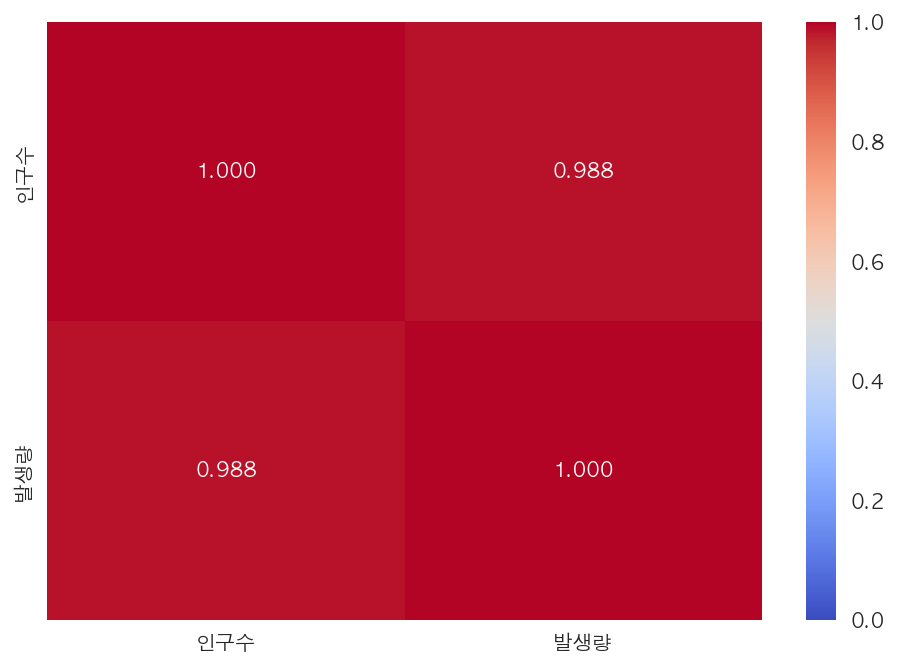

In [1019]:
_ = sns.heatmap(ocr_info_pop.corr(), cmap='coolwarm',
                annot=True, fmt='.3f', vmin=0, vmax=1)

In [1038]:
ocr_info_pop_19 = ocr_info_pop[ocr_info_pop['ÏãúÏ†ê'] == '2019']
ocr_info_pop_19 = ocr_info_pop_19.sort_values(['Ïù∏Íµ¨Ïàò', 'Î∞úÏÉùÎüâ'])
ocr_info_pop_19.head()



ÏãúÎèÑÎ™Ö    ÏãúÏ†ê      Ïù∏Íµ¨Ïàò     Î∞úÏÉùÎüâ
7   ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú  2019   346275  118734
16  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  2019   696657  350108
6     Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú  2019  1168469  462637
4     Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  2019  1480293  423473
5     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú  2019  1493979  469645

In [1041]:
ocr_info_pop_20 = ocr_info_pop[ocr_info_pop['ÏãúÏ†ê'] == '2020']
ocr_info_pop_20 = ocr_info_pop_20.sort_values(['Ïù∏Íµ¨Ïàò', 'Î∞úÏÉùÎüâ'])
ocr_info_pop_20.head()

ÏãúÎèÑÎ™Ö    ÏãúÏ†ê      Ïù∏Íµ¨Ïàò     Î∞úÏÉùÎüâ
24  ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú  2020   360907  117891
33  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  2020   697578  417739
23    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú  2020  1153901  422336
21    Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  2020  1471385  420659
22    ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú  2020  1480777  498151

In [1042]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=ocr_info_pop_20['ÏãúÎèÑÎ™Ö'],
        y=ocr_info_pop_20['Ïù∏Íµ¨Ïàò'],
        name="Ïù∏Íµ¨Ïàò",
        offsetgroup=1,
    ),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=ocr_info_pop_20['ÏãúÎèÑÎ™Ö'],
        y=ocr_info_pop_20['Î∞úÏÉùÎüâ'],
        name="Î∞úÏÉùÎüâ",
        offsetgroup=2,
    ),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020ÎÖÑ ÏãúÎèÑÎ≥Ñ Ïù∏Íµ¨ÏàòÏôÄ ÏÉùÌôúÌèêÍ∏∞Î¨º Î∞úÏÉùÎüâ Ï∂îÏù¥",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="ÏãúÎèÑÎ™Ö")

fig.update_yaxes(title_text="<b>Ïù∏Íµ¨Ïàò</b>(Î™Ö)", secondary_y=False)
fig.update_yaxes(title_text="<b>Î∞úÏÉùÎüâ</b>(ÌÜ§)", secondary_y=True)

fig.show()


In [1021]:
# Î∞úÏÉùÎüâÍ≥º Î©¥Ï†ÅÍ≥ºÏùò Í¥ÄÍ≥Ñ
info_area = info_m[(info_m['Íµ¨Ïó≠'] == 'Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠') &(info_m['Ìï≠Î™©'] == 'Î©¥Ï†Å (km¬≤)')]
info_area = info_area[['ÏãúÎèÑÎ™Ö', 'ÏãúÏ†ê', 'ÏàòÏπò']].rename(columns={'ÏàòÏπò':'Î©¥Ï†Å(km¬≤)'})
info_area.head()

ÏãúÎèÑÎ™Ö    ÏãúÏ†ê  Î©¥Ï†Å(km¬≤)
0   ÏÑúÏö∏ÌäπÎ≥ÑÏãú  2019      605
4   Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  2019      770
8   ÎåÄÍµ¨Í¥ëÏó≠Ïãú  2019      883
12  Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  2019     1063
16  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  2019      501

In [1022]:
info_area.shape, ocr_m.shape

((34, 3), (34, 3))

In [1023]:
ocr_info_area = pd.merge(info_area, ocr_m)
ocr_info_area.shape

(34, 4)

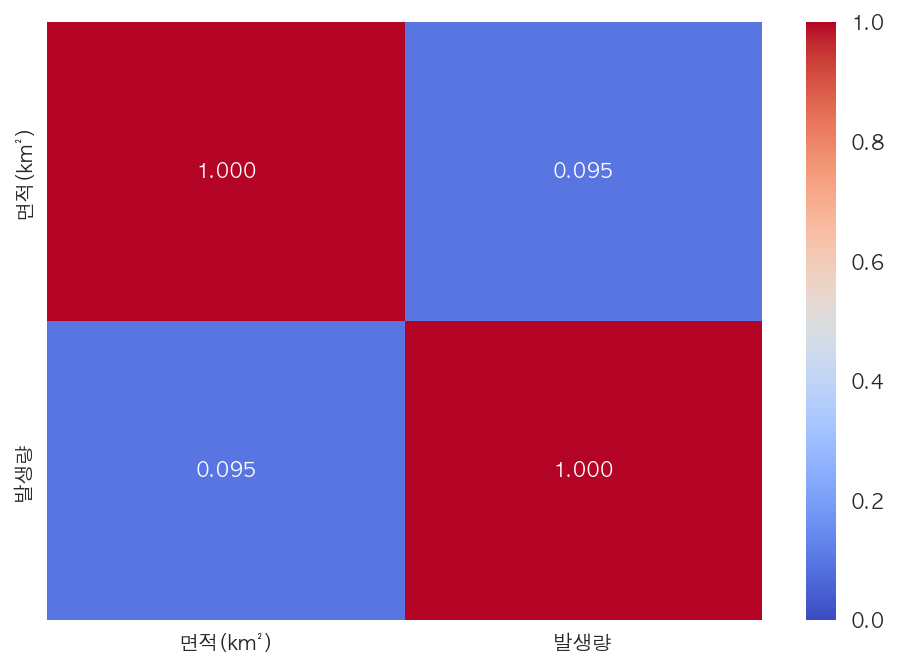

In [1025]:
_ = sns.heatmap(ocr_info_area.corr(), cmap='coolwarm',
                annot=True, fmt='.3f', vmin=0, vmax=1)

In [1050]:
ocr_info_area_20 = ocr_info_area[ocr_info_area['ÏãúÏ†ê'] == '2020']
ocr_info_area_20 = ocr_info_area_20.sort_values(['Î©¥Ï†Å(km¬≤)', 'Î∞úÏÉùÎüâ', ])
ocr_info_area_20.head()

ÏãúÎèÑÎ™Ö    ÏãúÏ†ê  Î©¥Ï†Å(km¬≤)      Î∞úÏÉùÎüâ
24  ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú  2020      464   117891
21    Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  2020      501   420659
22    ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú  2020      539   498151
17    ÏÑúÏö∏ÌäπÎ≥ÑÏãú  2020      605  3177620
18    Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  2020      770  1148394

In [1065]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=ocr_info_area_20['ÏãúÎèÑÎ™Ö'],
        y=ocr_info_area_20['Î©¥Ï†Å(km¬≤)'],
        name="Î©¥Ï†Å(km¬≤)",
        offsetgroup=1,
    ),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=ocr_info_area_20['ÏãúÎèÑÎ™Ö'],
        y=ocr_info_area_20['Î∞úÏÉùÎüâ'],
        name="Î∞úÏÉùÎüâ",
        offsetgroup=2,
    ),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020ÎÖÑ ÏãúÎèÑÎ≥Ñ Î©¥Ï†ÅÍ≥º ÏÉùÌôúÌèêÍ∏∞Î¨º Î∞úÏÉùÎüâ Ï∂îÏù¥",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="ÏãúÎèÑÎ™Ö")

fig.update_yaxes(title_text="<b>Î©¥Ï†Å</b>(km¬≤)", secondary_y=False)
fig.update_yaxes(title_text="<b>Î∞úÏÉùÎüâ</b>(ÌÜ§)", secondary_y=True)
fig.add_hline(y=5000, line_width=1, line_dash='dash', line_color='red',
            annotation_text='ÌèêÍ∏∞Î¨º Î∞úÏÉùÎüâ Î∞±ÎßåÌÜ§', annotation_position='bottom left')
fig.show()


In [1066]:
info_m

ÏãúÎèÑÎ™Ö          Íµ¨Ïó≠        Ìï≠Î™©    ÏãúÏ†ê       ÏàòÏπò
0      ÏÑúÏö∏ÌäπÎ≥ÑÏãú     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠  Î©¥Ï†Å (km¬≤)  2019      605
1      ÏÑúÏö∏ÌäπÎ≥ÑÏãú     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)  2019  9993743
2      ÏÑúÏö∏ÌäπÎ≥ÑÏãú  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠  Î©¥Ï†Å (km¬≤)  2019      605
3      ÏÑúÏö∏ÌäπÎ≥ÑÏãú  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)  2019  9993743
4      Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠  Î©¥Ï†Å (km¬≤)  2019      770
..       ...         ...       ...   ...      ...
131     Í≤ΩÏÉÅÎÇ®ÎèÑ  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)  2020  3404370
132  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠  Î©¥Ï†Å (km¬≤)  2020     1850
133  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ     Ï†ÑÏ≤¥ ÌñâÏ†ïÍµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)  2020   697578
134  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠  Î©¥Ï†Å (km¬≤)  2020     1850
135  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  ÏÉùÌôúÌèêÍ∏∞Î¨º Í¥ÄÎ¶¨Íµ¨Ïó≠    Ïù∏Íµ¨ (Î™Ö)  2020   697578

[136 rows x 5 columns]

----
#### ÏÜåÍ∞ÅÏãúÏÑ§ Ï†ïÎ≥¥ Îç∞Ïù¥ÌÑ∞


In [947]:
# ÏÜåÍ∞ÅÏãúÏÑ§ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
fire_raw = pd.read_csv('output/fire_1920.csv')
fire_raw.head()

ÏãúÎèÑÎ™Ö    ÏãúÏ†ê  ÏÜåÍ∞ÅÏãúÏÑ§Ïàò  Ï≤òÎ¶¨Îüâ(ÌÜ§)  Íµ≠ÎπÑ(Î∞±ÎßåÏõê)  ÏßÄÎ∞©ÎπÑ(Î∞±ÎßåÏõê)  Ïú†ÏßÄÍ¥ÄÎ¶¨ÎπÑ(Î∞±ÎßåÏõê/ÎÖÑ)  Í¥ÄÎ¶¨Ïù∏Ïõê  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  2019      5  713757    61302    314935         66693   315   
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  2020      5  716241    61302    314935         79500   315   
2  Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  2019      2  156891    20542     59729         13837    68   
3  Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  2020      2  144250    20542     59729         13859    70   
4  ÎåÄÍµ¨Í¥ëÏó≠Ïãú  2019      1   81294     8201     55897          9081    49   

   ÏóêÎÑàÏßÄÏù¥Ïö©(Gcal)  
0      1535848  
1      1560095  
2       333766  
3       331442  
4       169238

In [948]:
fire_g = fire_raw.groupby(['ÏãúÎèÑÎ™Ö', 'ÏãúÏ†ê'], as_index=False).sum()[['ÏãúÎèÑÎ™Ö', 'ÏãúÏ†ê', 'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò']]
fire_g.head()


ÏãúÎèÑÎ™Ö    ÏãúÏ†ê  ÏÜåÍ∞ÅÏãúÏÑ§Ïàò
0   Í∞ïÏõêÎèÑ  2019     15
1   Í∞ïÏõêÎèÑ  2020     15
2   Í≤ΩÍ∏∞ÎèÑ  2019     27
3   Í≤ΩÍ∏∞ÎèÑ  2020     30
4  Í≤ΩÏÉÅÎÇ®ÎèÑ  2019     17

In [954]:
fire_g = fire_g.sort_values(['ÏÜåÍ∞ÅÏãúÏÑ§Ïàò', 'ÏãúÏ†ê'], ascending=[False, True])
px.histogram(fire_g, x='ÏãúÎèÑÎ™Ö', y='ÏÜåÍ∞ÅÏãúÏÑ§Ïàò', color='ÏãúÏ†ê',
             barmode='group', title='Ïó∞ÎèÑÎ≥Ñ ÏãúÎèÑÏóê Îî∞Î•∏ ÏÜåÍ∞ÅÏãúÏÑ§ Ïàò')


In [771]:
prs_fire_m.dtypes, fire_g.dtypes


(ÏãúÎèÑÎ™Ö     object
 ÏãúÏ†ê      object
 ÏÜåÍ∞ÅÎüâ    float64
 dtype: object,
 ÏãúÎèÑÎ™Ö      object
 ÏãúÏ†ê        int64
 ÏÜåÍ∞ÅÏãúÏÑ§Ïàò     int64
 dtype: object)

In [772]:
fire_g['ÏãúÏ†ê'] = fire_g['ÏãúÏ†ê'].astype('object')
fire_g.dtypes

ÏãúÎèÑÎ™Ö      object
ÏãúÏ†ê       object
ÏÜåÍ∞ÅÏãúÏÑ§Ïàò     int64
dtype: object

In [773]:
prs_fire_m.shape, fire_g.shape


((34, 3), (32, 3))

In [774]:
# Í¥ëÏ£ºÍ¥ëÏó≠ÏãúÍ∞Ä ÏÜåÍ∞ÅÎüâ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÎã§.
len(fire_g['ÏãúÎèÑÎ™Ö'].unique()), len(prs_fire_m['ÏãúÎèÑÎ™Ö'].unique())


(16, 17)

In [775]:
new_fire = [
    {
        'ÏãúÎèÑÎ™Ö' : 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú',
        'ÏãúÏ†ê' : 2019,
        'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò' : 0
    },
    {
        'ÏãúÎèÑÎ™Ö' : 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú',
        'ÏãúÏ†ê' : 2020,
        'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò' : 0
    },
]
fire_g = fire_g.append(new_fire, ignore_index=True, )
fire_g.tail()

/var/folders/21/dvhd5rm144sbp9s362bjvx400000gn/T/ipykernel_62051/3236850263.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



ÏãúÎèÑÎ™Ö    ÏãúÏ†ê  ÏÜåÍ∞ÅÏãúÏÑ§Ïàò
29   Ï∂©Ï≤≠ÎÇ®ÎèÑ  2020     11
30   Ï∂©Ï≤≠Î∂ÅÎèÑ  2019     10
31   Ï∂©Ï≤≠Î∂ÅÎèÑ  2020     11
32  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  2019      0
33  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  2020      0

In [776]:
set(fire_g['ÏãúÎèÑÎ™Ö'].unique().tolist()) == set(prs_fire_m['ÏãúÎèÑÎ™Ö'].unique().tolist())

True

In [777]:
fire_g['ÏãúÏ†ê'].unique(), prs_fire_m['ÏãúÏ†ê'].unique()

(array([2019, 2020], dtype=object), array(['2019', '2020'], dtype=object))

In [779]:
fire_g.loc[fire_g['ÏãúÏ†ê'] == 2019, 'ÏãúÏ†ê'] = fire_g.loc[fire_g['ÏãúÏ†ê'] == 2019, 'ÏãúÏ†ê'].replace(2019, '2019')
fire_g.loc[fire_g['ÏãúÏ†ê'] == 2020, 'ÏãúÏ†ê'] = fire_g.loc[fire_g['ÏãúÏ†ê'] == 2020, 'ÏãúÏ†ê'].replace(2020, '2020')
fire_g['ÏãúÏ†ê'].unique()


array(['2019', '2020'], dtype=object)

In [780]:
# ÏÜåÍ∞ÅÏãúÏÑ§Ïàò, ÏÜåÍ∞ÅÎüâ
prs_fire_g = pd.merge(prs_fire_m, fire_g,)
prs_fire_g.tail()

ÏãúÎèÑÎ™Ö    ÏãúÏ†ê       ÏÜåÍ∞ÅÎüâ  ÏÜåÍ∞ÅÏãúÏÑ§Ïàò
29     Ï†ÑÎùºÎÇ®ÎèÑ  2020  137129.0     53
30     Ï†ÑÎùºÎ∂ÅÎèÑ  2020  180143.7      3
31  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  2020  136694.6      6
32     Ï∂©Ï≤≠ÎÇ®ÎèÑ  2020  380293.1     11
33     Ï∂©Ï≤≠Î∂ÅÎèÑ  2020  273847.5     11

In [790]:
prs_fire_g_19 = prs_fire_g[prs_fire_g['ÏãúÏ†ê'] == '2019'].drop(columns='ÏãúÏ†ê')
prs_fire_g_20 = prs_fire_g[prs_fire_g['ÏãúÏ†ê'] == '2020'].drop(columns='ÏãúÏ†ê')
prs_fire_g_20.tail()


ÏãúÎèÑÎ™Ö       ÏÜåÍ∞ÅÎüâ  ÏÜåÍ∞ÅÏãúÏÑ§Ïàò
29     Ï†ÑÎùºÎÇ®ÎèÑ  137129.0     53
30     Ï†ÑÎùºÎ∂ÅÎèÑ  180143.7      3
31  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  136694.6      6
32     Ï∂©Ï≤≠ÎÇ®ÎèÑ  380293.1     11
33     Ï∂©Ï≤≠Î∂ÅÎèÑ  273847.5     11

In [792]:
prs_fire_m_19 = prs_fire_g_19.melt(
    id_vars=['ÏãúÎèÑÎ™Ö',], var_name='ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò', value_name='2019')
prs_fire_m_19.head()


ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       2019
0    Í∞ïÏõêÎèÑ       ÏÜåÍ∞ÅÎüâ   152570.0
1    Í≤ΩÍ∏∞ÎèÑ       ÏÜåÍ∞ÅÎüâ  1323709.0
2   Í≤ΩÏÉÅÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   409676.0
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ       ÏÜåÍ∞ÅÎüâ   391170.5
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú       ÏÜåÍ∞ÅÎüâ     4964.0

In [793]:
prs_fire_m_20 = prs_fire_g_20.melt(
    id_vars=['ÏãúÎèÑÎ™Ö',], var_name='ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò', value_name='2020')
prs_fire_m_20.head()

ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       2020
0    Í∞ïÏõêÎèÑ       ÏÜåÍ∞ÅÎüâ   161357.0
1    Í≤ΩÍ∏∞ÎèÑ       ÏÜåÍ∞ÅÎüâ  1405946.4
2   Í≤ΩÏÉÅÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   393281.7
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ       ÏÜåÍ∞ÅÎüâ   456366.9
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú       ÏÜåÍ∞ÅÎüâ    13906.1

In [920]:
bg_colors = ['#ef553b'] * len(ocr_raw['ÏãúÎèÑÎ™Ö'])
# bg_colors[0] = '#fecb52'
bg_colors[0] = '#fecb52'
bg_colors[2] = '#fecb52'
bg_colors[3] = '#fecb52'
bg_colors[11] = '#fecb52'
bg_colors[12] = '#fecb52'
bg_colors[14] = '#fecb52'

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=prs_fire_m_19['ÏãúÎèÑÎ™Ö'], y=(prs_fire_m_19.loc[prs_fire_m_19['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÎüâ', '2019']),
    name="ÏÜåÍ∞ÅÎüâ", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=prs_fire_m_19['ÏãúÎèÑÎ™Ö'], y=(prs_fire_m_19.loc[prs_fire_m_19['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò', '2019']),
           name="ÏÜåÍ∞ÅÏãúÏÑ§", offsetgroup=2, marker_color=bg_colors),
    secondary_y=True,
)

fig.update_layout(
    title_text="2019ÎÖÑ ÌèêÍ∏∞Î¨º ÏÜåÍ∞ÅÎüâ Î∞è ÏÜåÍ∞ÅÏãúÏÑ§ Ï∂îÏù¥",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="ÏãúÎèÑÎ™Ö")

fig.update_yaxes(title_text="<b>ÏÜåÍ∞ÅÎüâ</b>(ÌÜ§)", secondary_y=False)
fig.update_yaxes(title_text="<b>ÏÜåÍ∞ÅÏãúÏÑ§</b>(Í∞úÏÜå)", secondary_y=True)

# fig.add_annotation(x=1, y=1, yshift=250,
#                     text='<b>Max !</b>',
#                     showarrow=False)
# fig.add_annotation(x=11, y=1, xshift=30, yshift=90,
#                     text='<b style="color:white"> ÏÜåÍ∞ÅÏãúÏÑ§Ïù¥ Îçî ÎÜíÏùÄ Í≥≥ üí∞</b>',
#                     showarrow=False, bordercolor='black', borderpad=2, bgcolor='black')
fig.show()


In [933]:
bg_colors = ['#ef553b'] * len(ocr_raw['ÏãúÎèÑÎ™Ö'])
# bg_colors[0] = '#fecb52'
bg_colors[0] = '#fecb52'
bg_colors[2] = '#fecb52'
bg_colors[3] = '#fecb52'
bg_colors[11] = '#fecb52'
bg_colors[12] = '#fecb52'
bg_colors[14] = '#fecb52'
bg_colors[16] = '#fecb52'

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=prs_fire_m_20['ÏãúÎèÑÎ™Ö'], y=(prs_fire_m_20.loc[prs_fire_m_20['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÎüâ', '2020']),
    name="ÏÜåÍ∞ÅÎüâ", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=prs_fire_m_20['ÏãúÎèÑÎ™Ö'], y=(prs_fire_m_20.loc[prs_fire_m_20['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò', '2020']),
           name="ÏÜåÍ∞ÅÏãúÏÑ§", offsetgroup=2,
           marker_color=bg_colors,
           text=(prs_fire_m_20.loc[prs_fire_m_20['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò', '2020'])),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020ÎÖÑ ÌèêÍ∏∞Î¨º ÏÜåÍ∞ÅÎüâ Î∞è ÏÜåÍ∞ÅÏãúÏÑ§ Ï∂îÏù¥",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="ÏãúÎèÑÎ™Ö")

fig.update_yaxes(title_text="<b>ÏÜåÍ∞ÅÎüâ</b>(ÌÜ§)", secondary_y=False)
fig.update_yaxes(title_text="<b>ÏÜåÍ∞ÅÏãúÏÑ§</b>(Í∞úÏÜå)", secondary_y=True)

# fig.add_annotation(x=1, y=1, yshift=250,
#                     text='<b>Max !</b>',
#                     showarrow=False)
# fig.add_annotation(x=11, y=1, xshift=30, yshift=90,
#                     text='<b style="color:white"> ÏÜåÍ∞ÅÏãúÏÑ§Ïù¥ Îçî ÎÜíÏùÄ Í≥≥ üí∞</b>',
#                     showarrow=False, bordercolor='black', borderpad=2, bgcolor='black')
fig.show()


In [855]:
prs_fire_top_sido_19 = prs_fire_m_19[prs_fire_m_19['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÎüâ']\
                .sort_values('2019', ascending=False).head(4)['ÏãúÎèÑÎ™Ö']
prs_fire_top_sido_19


1      Í≤ΩÍ∏∞ÎèÑ
8    ÏÑúÏö∏ÌäπÎ≥ÑÏãú
2     Í≤ΩÏÉÅÎÇ®ÎèÑ
3     Í≤ΩÏÉÅÎ∂ÅÎèÑ
Name: ÏãúÎèÑÎ™Ö, dtype: object

In [857]:
prs_fire_top_19 = prs_fire_m_19[prs_fire_m_19['ÏãúÎèÑÎ™Ö'].isin(prs_fire_top_sido_19)].sort_values('2019', ascending=False)
prs_fire_top_19

ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       2019
1     Í≤ΩÍ∏∞ÎèÑ       ÏÜåÍ∞ÅÎüâ  1323709.0
8   ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÜåÍ∞ÅÎüâ   790225.0
2    Í≤ΩÏÉÅÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   409676.0
3    Í≤ΩÏÉÅÎ∂ÅÎèÑ       ÏÜåÍ∞ÅÎüâ   391170.5
18    Í≤ΩÍ∏∞ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       27.0
20   Í≤ΩÏÉÅÎ∂ÅÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       18.0
19   Í≤ΩÏÉÅÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       17.0
25  ÏÑúÏö∏ÌäπÎ≥ÑÏãú     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò        5.0

In [858]:
prs_fire_bot_sido_19 = prs_fire_m_19[prs_fire_m_19['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò']\
                .sort_values('2019', ascending=False).head(4)['ÏãúÎèÑÎ™Ö']
prs_fire_bot_sido_19


29    Ï†ÑÎùºÎÇ®ÎèÑ
18     Í≤ΩÍ∏∞ÎèÑ
20    Í≤ΩÏÉÅÎ∂ÅÎèÑ
19    Í≤ΩÏÉÅÎÇ®ÎèÑ
Name: ÏãúÎèÑÎ™Ö, dtype: object

In [859]:
prs_fire_bot_19 = prs_fire_m_19[prs_fire_m_19['ÏãúÎèÑÎ™Ö'].isin(
    prs_fire_bot_sido_19)].sort_values('2019', ascending=False)
prs_fire_bot_19


ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       2019
1    Í≤ΩÍ∏∞ÎèÑ       ÏÜåÍ∞ÅÎüâ  1323709.0
2   Í≤ΩÏÉÅÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   409676.0
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ       ÏÜåÍ∞ÅÎüâ   391170.5
12  Ï†ÑÎùºÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   122384.5
29  Ï†ÑÎùºÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       53.0
18   Í≤ΩÍ∏∞ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       27.0
20  Í≤ΩÏÉÅÎ∂ÅÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       18.0
19  Í≤ΩÏÉÅÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       17.0

In [895]:
prs_fire_5_19 = pd.concat([prs_fire_top_19, prs_fire_bot_19]).drop_duplicates()
prs_fire_5_19 = prs_fire_5_19.groupby(['ÏãúÎèÑÎ™Ö', 'ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'], as_index=False).sum()
prs_fire_5_19

ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       2019
0    Í≤ΩÍ∏∞ÎèÑ       ÏÜåÍ∞ÅÎüâ  1323709.0
1    Í≤ΩÍ∏∞ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       27.0
2   Í≤ΩÏÉÅÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   409676.0
3   Í≤ΩÏÉÅÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       17.0
4   Í≤ΩÏÉÅÎ∂ÅÎèÑ       ÏÜåÍ∞ÅÎüâ   391170.5
5   Í≤ΩÏÉÅÎ∂ÅÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       18.0
6  ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÜåÍ∞ÅÎüâ   790225.0
7  ÏÑúÏö∏ÌäπÎ≥ÑÏãú     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò        5.0
8   Ï†ÑÎùºÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   122384.5
9   Ï†ÑÎùºÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       53.0

In [903]:
prs_fire_5_19_f = prs_fire_5_19[prs_fire_5_19['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÎüâ']
prs_fire_5_19_f = prs_fire_5_19_f.sort_values('2019', ascending=False)
prs_fire_5_19_f


ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       2019
0    Í≤ΩÍ∏∞ÎèÑ       ÏÜåÍ∞ÅÎüâ  1323709.0
6  ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÜåÍ∞ÅÎüâ   790225.0
2   Í≤ΩÏÉÅÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   409676.0
4   Í≤ΩÏÉÅÎ∂ÅÎèÑ       ÏÜåÍ∞ÅÎüâ   391170.5
8   Ï†ÑÎùºÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   122384.5

In [908]:
prs_fire_5_19_f['ÏãúÎèÑÎ™Ö'].to_list()

['Í≤ΩÍ∏∞ÎèÑ', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'Í≤ΩÏÉÅÎÇ®ÎèÑ', 'Í≤ΩÏÉÅÎ∂ÅÎèÑ', 'Ï†ÑÎùºÎÇ®ÎèÑ']

In [913]:
prs_fire_5_19_c = prs_fire_5_19[prs_fire_5_19['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò']
prs_fire_5_19_c = prs_fire_5_19_c.set_index('ÏãúÎèÑÎ™Ö').reindex(prs_fire_5_19_f['ÏãúÎèÑÎ™Ö'].to_list())
prs_fire_5_19_c = prs_fire_5_19_c.reset_index()
prs_fire_5_19_c


ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò  2019
0    Í≤ΩÍ∏∞ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò  27.0
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò   5.0
2   Í≤ΩÏÉÅÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò  17.0
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò  18.0
4   Ï†ÑÎùºÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò  53.0

In [934]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=prs_fire_5_19_f['ÏãúÎèÑÎ™Ö'],
        y=(prs_fire_5_19_f.loc[prs_fire_5_19_f['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÎüâ', '2019']),
        name="ÏÜåÍ∞ÅÎüâ", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=prs_fire_5_19_c['ÏãúÎèÑÎ™Ö'],
        y=(prs_fire_5_19_c.loc[prs_fire_5_19_c['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò', '2019']),
        name="ÏÜåÍ∞ÅÏãúÏÑ§Ïàò", offsetgroup=2,),
    secondary_y=True,
)

fig.update_layout(
    title_text="2019ÎÖÑ ÌèêÍ∏∞Î¨º ÏÜåÍ∞ÅÎüâ Î∞è ÏÜåÍ∞ÅÏãúÏÑ§ Top4 Ï∂îÏù¥",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="ÏãúÎèÑÎ™Ö")

fig.update_yaxes(title_text="<b>ÏÜåÍ∞ÅÎüâ</b>(ÌÜ§)", secondary_y=False)
fig.update_yaxes(title_text="<b>ÏÜåÍ∞ÅÏãúÏÑ§Ïàò</b>(Í∞úÏÜå)", secondary_y=True)

# fig.add_annotation(x=1, y=1, yshift=250,
#                     text='<b>Max !</b>',
#                     showarrow=False)
# fig.add_annotation(x=11, y=1, xshift=30, yshift=90,
#                     text='<b style="color:white"> ÏÜåÍ∞ÅÏãúÏÑ§Ïù¥ Îçî ÎÜíÏùÄ Í≥≥ üí∞</b>',
#                     showarrow=False, bordercolor='black', borderpad=2, bgcolor='black')
fig.show()


In [922]:
prs_fire_top_sido_20 = prs_fire_m_20[prs_fire_m_20['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÎüâ']\
                .sort_values('2020', ascending=False).head(4)['ÏãúÎèÑÎ™Ö']
prs_fire_top_sido_20


1      Í≤ΩÍ∏∞ÎèÑ
8    ÏÑúÏö∏ÌäπÎ≥ÑÏãú
3     Í≤ΩÏÉÅÎ∂ÅÎèÑ
2     Í≤ΩÏÉÅÎÇ®ÎèÑ
Name: ÏãúÎèÑÎ™Ö, dtype: object

In [923]:
prs_fire_top_20 = prs_fire_m_20[prs_fire_m_20['ÏãúÎèÑÎ™Ö'].isin(prs_fire_top_sido_20)].sort_values('2020', ascending=False)
prs_fire_top_20

ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       2020
1     Í≤ΩÍ∏∞ÎèÑ       ÏÜåÍ∞ÅÎüâ  1405946.4
8   ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÜåÍ∞ÅÎüâ   797766.1
3    Í≤ΩÏÉÅÎ∂ÅÎèÑ       ÏÜåÍ∞ÅÎüâ   456366.9
2    Í≤ΩÏÉÅÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   393281.7
18    Í≤ΩÍ∏∞ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       30.0
20   Í≤ΩÏÉÅÎ∂ÅÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       18.0
19   Í≤ΩÏÉÅÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       17.0
25  ÏÑúÏö∏ÌäπÎ≥ÑÏãú     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò        5.0

In [924]:
prs_fire_bot_sido_20 = prs_fire_m_20[prs_fire_m_20['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò']\
                .sort_values('2020', ascending=False).head(4)['ÏãúÎèÑÎ™Ö']
prs_fire_bot_sido_20


29    Ï†ÑÎùºÎÇ®ÎèÑ
18     Í≤ΩÍ∏∞ÎèÑ
20    Í≤ΩÏÉÅÎ∂ÅÎèÑ
19    Í≤ΩÏÉÅÎÇ®ÎèÑ
Name: ÏãúÎèÑÎ™Ö, dtype: object

In [925]:
prs_fire_bot_20 = prs_fire_m_20[prs_fire_m_20['ÏãúÎèÑÎ™Ö'].isin(
    prs_fire_bot_sido_20)].sort_values('2020', ascending=False)
prs_fire_bot_20


ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       2020
1    Í≤ΩÍ∏∞ÎèÑ       ÏÜåÍ∞ÅÎüâ  1405946.4
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ       ÏÜåÍ∞ÅÎüâ   456366.9
2   Í≤ΩÏÉÅÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   393281.7
12  Ï†ÑÎùºÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   137129.0
29  Ï†ÑÎùºÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       53.0
18   Í≤ΩÍ∏∞ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       30.0
20  Í≤ΩÏÉÅÎ∂ÅÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       18.0
19  Í≤ΩÏÉÅÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       17.0

In [926]:
prs_fire_5_20 = pd.concat([prs_fire_top_20, prs_fire_bot_20]).drop_duplicates()
prs_fire_5_20 = prs_fire_5_20.groupby(['ÏãúÎèÑÎ™Ö', 'ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'], as_index=False).sum()
prs_fire_5_20

ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       2020
0    Í≤ΩÍ∏∞ÎèÑ       ÏÜåÍ∞ÅÎüâ  1405946.4
1    Í≤ΩÍ∏∞ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       30.0
2   Í≤ΩÏÉÅÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   393281.7
3   Í≤ΩÏÉÅÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       17.0
4   Í≤ΩÏÉÅÎ∂ÅÎèÑ       ÏÜåÍ∞ÅÎüâ   456366.9
5   Í≤ΩÏÉÅÎ∂ÅÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       18.0
6  ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÜåÍ∞ÅÎüâ   797766.1
7  ÏÑúÏö∏ÌäπÎ≥ÑÏãú     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò        5.0
8   Ï†ÑÎùºÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   137129.0
9   Ï†ÑÎùºÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       53.0

In [927]:
prs_fire_5_20_f = prs_fire_5_20[prs_fire_5_20['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÎüâ']
prs_fire_5_20_f = prs_fire_5_20_f.sort_values('2020', ascending=False)
prs_fire_5_20_f


ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò       2020
0    Í≤ΩÍ∏∞ÎèÑ       ÏÜåÍ∞ÅÎüâ  1405946.4
6  ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÜåÍ∞ÅÎüâ   797766.1
4   Í≤ΩÏÉÅÎ∂ÅÎèÑ       ÏÜåÍ∞ÅÎüâ   456366.9
2   Í≤ΩÏÉÅÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   393281.7
8   Ï†ÑÎùºÎÇ®ÎèÑ       ÏÜåÍ∞ÅÎüâ   137129.0

In [928]:
prs_fire_5_20_c = prs_fire_5_20[prs_fire_5_20['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò']
prs_fire_5_20_c = prs_fire_5_20_c.set_index('ÏãúÎèÑÎ™Ö').reindex(prs_fire_5_20_f['ÏãúÎèÑÎ™Ö'].to_list())
prs_fire_5_20_c = prs_fire_5_20_c.reset_index()
prs_fire_5_20_c


ÏãúÎèÑÎ™Ö ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò  2020
0    Í≤ΩÍ∏∞ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò  30.0
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò   5.0
2   Í≤ΩÏÉÅÎ∂ÅÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò  18.0
3   Í≤ΩÏÉÅÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò  17.0
4   Ï†ÑÎùºÎÇ®ÎèÑ     ÏÜåÍ∞ÅÏãúÏÑ§Ïàò  53.0

In [929]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=prs_fire_5_20_f['ÏãúÎèÑÎ™Ö'],
        y=(prs_fire_5_20_f.loc[prs_fire_5_20_f['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÎüâ', '2020']),
        name="ÏÜåÍ∞ÅÎüâ", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=prs_fire_5_20_c['ÏãúÎèÑÎ™Ö'],
        y=(prs_fire_5_20_c.loc[prs_fire_5_20_c['ÏÜåÍ∞ÅÎüâ/ÏÜåÍ∞ÅÏãúÏÑ§Ïàò'] == 'ÏÜåÍ∞ÅÏãúÏÑ§Ïàò', '2020']),
        name="ÏÜåÍ∞ÅÏãúÏÑ§Ïàò", offsetgroup=2,),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020ÎÖÑ ÌèêÍ∏∞Î¨º ÏÜåÍ∞ÅÎüâ Î∞è ÏÜåÍ∞ÅÏãúÏÑ§ Top4 Ï∂îÏù¥",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="ÏãúÎèÑÎ™Ö")

fig.update_yaxes(title_text="<b>ÏÜåÍ∞ÅÎüâ</b>(ÌÜ§)", secondary_y=False)
fig.update_yaxes(title_text="<b>ÏÜåÍ∞ÅÏãúÏÑ§Ïàò</b>(Í∞úÏÜå)", secondary_y=True)

fig.show()


----
#### Îß§Î¶ΩÏãúÏÑ§ ÏãúÍ∞ÅÌôî

In [938]:
land_raw = pd.read_csv('output/land_1920.csv')
land_raw.head()

ÏãúÎèÑÎ™Ö    ÏãúÏ†ê  Îß§Î¶ΩÏãúÏÑ§Ïàò   Í∏∞Îß§Î¶ΩÎüâ(m¬≥)   Îß§Î¶ΩÎüâ(ÌÜ§)  Íµ≠ÎπÑ(Î∞±ÎßåÏõê)  ÏßÄÎ∞©ÎπÑ(Î∞±ÎßåÏõê)  Ïú†ÏßÄÍ¥ÄÎ¶¨ÎπÑ(Î∞±ÎßåÏõê/ÎÖÑ)  \
0  Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  2019      1   15566090   232256    88663    275139          4914   
1  Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  2020      1   15872690   229270    88663    275139          4544   
2  ÎåÄÍµ¨Í¥ëÏó≠Ïãú  2019      1   12971602   322243    19591    195303          8634   
3  ÎåÄÍµ¨Í¥ëÏó≠Ïãú  2020      1   13366674   347794    19591    195303          8634   
4  Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  2019      5  156889120  2879634     2386    499183        459971   

   Í¥ÄÎ¶¨Ïù∏Ïõê  
0    31  
1    33  
2    52  
3    52  
4   350

In [939]:
land_g = land_raw.groupby(['ÏãúÎèÑÎ™Ö', 'ÏãúÏ†ê'], as_index=False).sum()[['ÏãúÎèÑÎ™Ö', 'ÏãúÏ†ê', 'Îß§Î¶ΩÏãúÏÑ§Ïàò']]
land_g.head()


ÏãúÎèÑÎ™Ö    ÏãúÏ†ê  Îß§Î¶ΩÏãúÏÑ§Ïàò
0   Í∞ïÏõêÎèÑ  2019     24
1   Í∞ïÏõêÎèÑ  2020     24
2   Í≤ΩÍ∏∞ÎèÑ  2019      9
3   Í≤ΩÍ∏∞ÎèÑ  2020      9
4  Í≤ΩÏÉÅÎÇ®ÎèÑ  2019     25

In [952]:
land_g = land_g.sort_values(['Îß§Î¶ΩÏãúÏÑ§Ïàò', 'ÏãúÏ†ê'], ascending=[False, True])
land_g.head()

ÏãúÎèÑÎ™Ö    ÏãúÏ†ê  Îß§Î¶ΩÏãúÏÑ§Ïàò
22  Ï†ÑÎùºÎÇ®ÎèÑ  2019     62
23  Ï†ÑÎùºÎÇ®ÎèÑ  2020     62
7   Í≤ΩÏÉÅÎ∂ÅÎèÑ  2020     34
6   Í≤ΩÏÉÅÎ∂ÅÎèÑ  2019     33
4   Í≤ΩÏÉÅÎÇ®ÎèÑ  2019     25

In [953]:
px.histogram(land_g, x='ÏãúÎèÑÎ™Ö', y='Îß§Î¶ΩÏãúÏÑ§Ïàò', color='ÏãúÏ†ê',
            barmode='group', title='Ïó∞ÎèÑÎ≥Ñ ÏãúÎèÑÏóê Îî∞Î•∏ Îß§Î¶ΩÏãúÏÑ§ Ïàò')

In [959]:
land_g.dtypes, prs_land_m.dtypes

(ÏãúÎèÑÎ™Ö      object
 ÏãúÏ†ê        int64
 Îß§Î¶ΩÏãúÏÑ§Ïàò     int64
 dtype: object,
 ÏãúÎèÑÎ™Ö     object
 ÏãúÏ†ê      object
 Îß§Î¶ΩÎüâ    float64
 dtype: object)

In [961]:
prs_land_m['ÏãúÏ†ê'] = prs_land_m['ÏãúÏ†ê'].astype('int')
prs_land_m.dtypes


ÏãúÎèÑÎ™Ö     object
ÏãúÏ†ê       int64
Îß§Î¶ΩÎüâ    float64
dtype: object

In [962]:
# ÏÜåÍ∞ÅÏãúÏÑ§Ïàò, ÏÜåÍ∞ÅÎüâ
prs_land_g = pd.merge(prs_land_m, land_g,)
prs_land_g.tail()

ÏãúÎèÑÎ™Ö    ÏãúÏ†ê       Îß§Î¶ΩÎüâ  Îß§Î¶ΩÏãúÏÑ§Ïàò
27     Ï†ÑÎùºÎÇ®ÎèÑ  2020  236183.2     62
28     Ï†ÑÎùºÎ∂ÅÎèÑ  2020  119065.2     13
29  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  2020   19147.0      7
30     Ï∂©Ï≤≠ÎÇ®ÎèÑ  2020   67713.5     15
31     Ï∂©Ï≤≠Î∂ÅÎèÑ  2020  110587.1     11

In [966]:
prs_land_g_19 = prs_land_g[prs_land_g['ÏãúÏ†ê'] == 2019].drop(columns='ÏãúÏ†ê')
prs_land_g_20 = prs_land_g[prs_land_g['ÏãúÏ†ê'] == 2020].drop(columns='ÏãúÏ†ê')
prs_land_g_20.tail()


ÏãúÎèÑÎ™Ö       Îß§Î¶ΩÎüâ  Îß§Î¶ΩÏãúÏÑ§Ïàò
27     Ï†ÑÎùºÎÇ®ÎèÑ  236183.2     62
28     Ï†ÑÎùºÎ∂ÅÎèÑ  119065.2     13
29  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ   19147.0      7
30     Ï∂©Ï≤≠ÎÇ®ÎèÑ   67713.5     15
31     Ï∂©Ï≤≠Î∂ÅÎèÑ  110587.1     11

In [987]:
prs_land_m_19 = prs_land_g_19.melt(
    id_vars=['ÏãúÎèÑÎ™Ö',], var_name='Îß§Î¶ΩÎüâ/Îß§Î¶ΩÏãúÏÑ§Ïàò', value_name='2019')
prs_land_m_19.head()


ÏãúÎèÑÎ™Ö Îß§Î¶ΩÎüâ/Îß§Î¶ΩÏãúÏÑ§Ïàò      2019
0    Í∞ïÏõêÎèÑ       Îß§Î¶ΩÎüâ  205787.0
1    Í≤ΩÍ∏∞ÎèÑ       Îß§Î¶ΩÎüâ  340983.0
2   Í≤ΩÏÉÅÎÇ®ÎèÑ       Îß§Î¶ΩÎüâ  205531.5
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ       Îß§Î¶ΩÎüâ  138262.0
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú       Îß§Î¶ΩÎüâ  189435.0

In [988]:
prs_land_m_20 = prs_land_g_20.melt(
    id_vars=['ÏãúÎèÑÎ™Ö',], var_name='Îß§Î¶ΩÎüâ/Îß§Î¶ΩÏãúÏÑ§Ïàò', value_name='2020')
prs_land_m_20.head()

ÏãúÎèÑÎ™Ö Îß§Î¶ΩÎüâ/Îß§Î¶ΩÏãúÏÑ§Ïàò      2020
0    Í∞ïÏõêÎèÑ       Îß§Î¶ΩÎüâ  184622.3
1    Í≤ΩÍ∏∞ÎèÑ       Îß§Î¶ΩÎüâ  340173.9
2   Í≤ΩÏÉÅÎÇ®ÎèÑ       Îß§Î¶ΩÎüâ  220772.3
3   Í≤ΩÏÉÅÎ∂ÅÎèÑ       Îß§Î¶ΩÎüâ  107134.9
4  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú       Îß§Î¶ΩÎüâ  170417.3

In [989]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=prs_land_m_19['ÏãúÎèÑÎ™Ö'],
        y=(prs_land_m_19.loc[prs_land_m_19['Îß§Î¶ΩÎüâ/Îß§Î¶ΩÏãúÏÑ§Ïàò'] == 'Îß§Î¶ΩÎüâ', '2019']),
        name="Îß§Î¶ΩÎüâ", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=prs_land_m_19['ÏãúÎèÑÎ™Ö'],
        y=(prs_land_m_19.loc[prs_land_m_19['Îß§Î¶ΩÎüâ/Îß§Î¶ΩÏãúÏÑ§Ïàò'] == 'Îß§Î¶ΩÏãúÏÑ§Ïàò', '2019']),
        name="Îß§Î¶ΩÏãúÏÑ§", offsetgroup=2,),
    secondary_y=True,
)

fig.update_layout(
    title_text="2019ÎÖÑ ÌèêÍ∏∞Î¨º Îß§Î¶ΩÎüâ Î∞è Îß§Î¶ΩÏãúÏÑ§ Ï∂îÏù¥",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="ÏãúÎèÑÎ™Ö")

fig.update_yaxes(title_text="<b>Îß§Î¶ΩÎüâ</b>(ÌÜ§)", secondary_y=False)
fig.update_yaxes(title_text="<b>Îß§Î¶ΩÏãúÏÑ§</b>(Í∞úÏÜå)", secondary_y=True)
fig.show()


In [991]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=prs_land_m_20['ÏãúÎèÑÎ™Ö'],
        y=(prs_land_m_20.loc[prs_land_m_20['Îß§Î¶ΩÎüâ/Îß§Î¶ΩÏãúÏÑ§Ïàò'] == 'Îß§Î¶ΩÎüâ', '2020']),
        name="Îß§Î¶ΩÎüâ", offsetgroup=1,),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(
        x=prs_land_m_20['ÏãúÎèÑÎ™Ö'],
        y=(prs_land_m_20.loc[prs_land_m_20['Îß§Î¶ΩÎüâ/Îß§Î¶ΩÏãúÏÑ§Ïàò'] == 'Îß§Î¶ΩÏãúÏÑ§Ïàò', '2020']),
        name="Îß§Î¶ΩÏãúÏÑ§", offsetgroup=2,),
    secondary_y=True,
)

fig.update_layout(
    title_text="2020ÎÖÑ ÌèêÍ∏∞Î¨º Îß§Î¶ΩÎüâ Î∞è Îß§Î¶ΩÏãúÏÑ§ Ï∂îÏù¥",
    xaxis_tickangle=-45,
    barmode='group'
)

fig.update_xaxes(title_text="ÏãúÎèÑÎ™Ö")

fig.update_yaxes(title_text="<b>Îß§Î¶ΩÎüâ</b>(ÌÜ§)", secondary_y=False)
fig.update_yaxes(title_text="<b>Îß§Î¶ΩÏãúÏÑ§</b>(Í∞úÏÜå)", secondary_y=True)
fig.show()


-----
#### Í¥ÄÎ¶¨Íµ¨Ïó≠ Ï†ïÎ≥¥